## Linear Regression Using Pyspark

### House Prices: Advanced Regression Techniques

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

<img src='housesbanner.png' width="700" align="center"/>

There are 79 variables, the description are:

Data fields
Here's a brief version of what you'll find in the data description file.

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

### Pyspark Initializasing

In [1]:
# to make pyspark importable as a regular library
import findspark
findspark.init()

import pyspark

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

#initializasing SparkSession for creating Spark DataFrame
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

### Load Libraries

In [2]:
# Data Frame spark profiling 
from pyspark.sql.types import IntegerType, StringType, DoubleType, ShortType, DecimalType
import pyspark.sql.functions as func
from pyspark.sql.functions import isnull
from pyspark.sql.functions import isnan, when, count, col
from pyspark.sql.functions import mean
from pyspark.sql.functions import round
from pyspark.sql.types import Row
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf


# Pandas DF operation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array

# Modeling + Evaluation
from pyspark.ml.feature import VectorAssembler, VectorIndexer, OneHotEncoder, StringIndexer
from pyspark.sql.functions import when
from pyspark.sql import functions as F
from pyspark.sql.functions import avg
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression
from pyspark.ml.regression import DecisionTreeRegressor, RandomForestRegressor, GBTRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 
from sklearn.metrics import log_loss
from pyspark.sql.functions import corr
import pyspark.sql.functions as fn 
from pyspark.sql.functions import rank,sum,col
from pyspark.sql import Window

window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

### Load Data to Spark DataFrame

In [3]:
#Initializing File Type and path for data train
file_type = 'text'
path=r'train_house_pricing.csv'
delimeter=','

In [4]:
def load_data(file_type):
    """input type of file "text" or "parquet" and Return pyspark dataframe"""
    if file_type =="text": # use text as file type input
        df = spark.read.option("header", "true") \
                       .option("delimeter",delimeter)\
                       .option("inferSchema", "true") \
                       .csv(path)  #path file that you want import
    else:  
        df= spark.read.parquet("example.parquet") #path file that you want import
    return df

In [5]:
call function load_data
df = load_data(file_type)

In [6]:
#Initializing File Type and path for data test
file_type = 'text'
path=r'test.csv'
delimeter=','

In [7]:
#call function load_data
test_data = load_data(file_type)

In [8]:
help(load_data)

Help on function load_data in module __main__:

load_data(file_type)
    input type of file "text" or "parquet" and Return pyspark dataframe



### Check Data

In [9]:
type(df)

pyspark.sql.dataframe.DataFrame

In [10]:
type(test_data)

pyspark.sql.dataframe.DataFrame

In [11]:
test_data.show(4)

+----+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+
|  Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition2|BldgTy

In [12]:
df.show(4)

+---+----------+--------+-----------+-------+------+-----+--------+-----------+---------+---------+---------+------------+----------+----------+--------+----------+-----------+-----------+---------+------------+---------+--------+-----------+-----------+----------+----------+---------+---------+----------+--------+--------+------------+------------+----------+------------+----------+---------+-----------+-------+---------+----------+----------+--------+--------+------------+---------+------------+------------+--------+--------+------------+------------+-----------+------------+----------+----------+-----------+----------+-----------+------------+----------+----------+----------+----------+----------+----------+-----------+-------------+---------+-----------+--------+------+-----+-----------+-------+------+------+--------+-------------+---------+
| Id|MSSubClass|MSZoning|LotFrontage|LotArea|Street|Alley|LotShape|LandContour|Utilities|LotConfig|LandSlope|Neighborhood|Condition1|Condition

In [13]:
#Print Schema
len(df.columns), df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

(81, None)

In [14]:
test_data.printSchema(), len (test_data.columns)

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: string (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |--

(None, 80)

In [15]:
#rename Target('SalePrice') to 'label
df_final = df.withColumnRenamed('SalePrice','label')

In [16]:
#Change data types in data train
df_final=df_final.withColumn("LotFrontage", df_final["LotFrontage"].cast(IntegerType()))
df_final=df_final.withColumn("OverallQual", df_final["OverallQual"].cast(StringType()))
df_final=df_final.withColumn("OverallCond", df_final["OverallCond"].cast(StringType()))
df_final=df_final.withColumn("MasVnrArea", df_final["MasVnrArea"].cast(IntegerType()))
df_final=df_final.withColumn("GarageYrBlt", df_final["GarageYrBlt"].cast(IntegerType()))

In [17]:
df_final.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: integer (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: string (nullable = true)
 |-- OverallCond: string (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- 

In [18]:
#Change data types in data test
test_data=test_data.withColumn("LotFrontage", test_data["LotFrontage"].cast(IntegerType()))
test_data=test_data.withColumn("OverallQual", test_data["OverallQual"].cast(StringType()))
test_data=test_data.withColumn("OverallCond", test_data["OverallCond"].cast(StringType()))
test_data=test_data.withColumn("MasVnrArea", test_data["MasVnrArea"].cast(IntegerType()))
test_data=test_data.withColumn("GarageYrBlt", test_data["GarageYrBlt"].cast(IntegerType()))
test_data=test_data.withColumn("BsmtFinSF2", test_data["BsmtFinSF2"].cast(IntegerType()))
test_data=test_data.withColumn("BsmtFinSF1", test_data["BsmtFinSF1"].cast(IntegerType()))
test_data=test_data.withColumn("TotalBsmtSF", test_data["TotalBsmtSF"].cast(IntegerType()))
test_data=test_data.withColumn("BsmtUnfSF", test_data["BsmtUnfSF"].cast(IntegerType()))
test_data=test_data.withColumn("BsmtFullBath", test_data["BsmtFullBath"].cast(IntegerType()))
test_data=test_data.withColumn("BsmtHalfBath", test_data["BsmtHalfBath"].cast(IntegerType()))
test_data=test_data.withColumn("GarageArea", test_data["GarageArea"].cast(IntegerType()))
test_data=test_data.withColumn("GarageCars", test_data["GarageCars"].cast(IntegerType()))

In [19]:
test_data.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- MSSubClass: integer (nullable = true)
 |-- MSZoning: string (nullable = true)
 |-- LotFrontage: integer (nullable = true)
 |-- LotArea: integer (nullable = true)
 |-- Street: string (nullable = true)
 |-- Alley: string (nullable = true)
 |-- LotShape: string (nullable = true)
 |-- LandContour: string (nullable = true)
 |-- Utilities: string (nullable = true)
 |-- LotConfig: string (nullable = true)
 |-- LandSlope: string (nullable = true)
 |-- Neighborhood: string (nullable = true)
 |-- Condition1: string (nullable = true)
 |-- Condition2: string (nullable = true)
 |-- BldgType: string (nullable = true)
 |-- HouseStyle: string (nullable = true)
 |-- OverallQual: string (nullable = true)
 |-- OverallCond: string (nullable = true)
 |-- YearBuilt: integer (nullable = true)
 |-- YearRemodAdd: integer (nullable = true)
 |-- RoofStyle: string (nullable = true)
 |-- RoofMatl: string (nullable = true)
 |-- Exterior1st: string (nullable = true)
 |-- 

##### categorical and nummerical variable in df-final

In [20]:
#Categorical and numerical variable
#just will select string data type
cat_cols = [item[0] for item in df_final.dtypes if item[1].startswith('string')] 
print("cat_cols:", cat_cols)

#just will select integer or double data type
num_cols = [item[0] for item in df_final.dtypes if item[1].startswith('int') | item[1].startswith('double')] 
print("num_cols:", num_cols)

cat_cols: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
num_cols: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckS

In [21]:
#Save column Id
num_id=num_cols.pop(0)
print("num_id:", num_id)
num_id=[num_id]
print(num_id)

#Remove column 'label' from numerical columns group
num_cols.remove('label') #label is removed because it's the target to validate the model
print("num_cols:", num_cols)

num_id: Id
['Id']
num_cols: ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [22]:
#count number of observation
df_final.count()

1460

In [23]:
# Check summary statistic of numerical columns
df_final.select(num_cols).describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------+------------------+-----------------+------------------+-----------------+-----------------+-------------------+--------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+
|summary|        MSSubClass|      LotFrontage|           LotArea|         YearBuilt|      YearRemodAdd|        MasVnrArea|       BsmtFinSF1|       BsmtFinSF2|        BsmtUnfSF|       TotalBsmtSF|         1stFlrSF|          2ndFlrSF|     LowQualFinSF|        GrLivArea|       BsmtFullBath|        BsmtHalfBath|          FullBath|           HalfBath| 

##### Categorical and numerical variables in test_data

In [24]:
#Categorical and numerical variable
#just will select string data type
cat_cols_test = [item[0] for item in test_data.dtypes if item[1].startswith('string')] 
print("cat_cols_test:", cat_cols_test)

#just will select integer or double data type
num_cols_test = [item[0] for item in test_data.dtypes if item[1].startswith('int') | item[1].startswith('double')] 
print("num_cols_test:", num_cols_test)

cat_cols_test: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
num_cols_test: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 

In [25]:
#Save column Id
num_id_test=num_cols_test.pop(0)
print("num_id_test:", num_id_test)
num_id_test=[num_id_test]
print(num_id_test)
print(num_cols_test)

num_id_test: Id
['Id']
['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [26]:
test_data.count()

1459

### Check Missing Value in data train

We are using two metode to check missing values:
1. Using pandas dataframe
2. Using pyspark dataframe


#### Using pandas dataframe

In [37]:
df_pd=df_final.toPandas()

In [38]:
#Check Missing value with proportion in Pandas DataFrame

def missing_values_table(df_pd):
    """Input pandas dataframe and Return columns with missing value&percentage and stored as pandas dataframe"""
    mis_val = df_pd.isnull().sum() #count total of null in each columns in dataframe
    mis_val_percent = 100 * df_pd.isnull().sum() / len(df_pd) #count percentage of null in each columns
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)  #join to left (as column) between mis_val and mis_val_percent and create it as dataframe
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'}) #rename columns in table, mis_val to Missing Values and mis_val_percent to % of Total Values
    mis_val_table_ren_columns = mis_val_table_ren_columns[
    mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)         #sort column % of Total Values descending and round 1 after point(coma)
    print ("Your selected dataframe has " + str(df_pd.shape[1]) + " columns.\n"    #.shape[1] : just view total columns in dataframe  
    "There are " + str(mis_val_table_ren_columns.shape[0]) +              
    " columns that have missing values.") #.shape[0] : just view total rows in dataframe
    return mis_val_table_ren_columns

In [39]:
help(missing_values_table)

Help on function missing_values_table in module __main__:

missing_values_table(df_pd)
    Input pandas dataframe and Return columns with missing value&percentage and stored as pandas dataframe



In [40]:
b=missing_values_table(df_pd)
b

Your selected dataframe has 81 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


#### Using pyspark Dataframe

In [27]:
#Check Missing Value in Pyspark Dataframe
def count_nulls(df_final):
    """Input pyspark dataframe and return list of columns with missing value and it's total value"""
    null_counts = []          #make an empty list to hold our results
    for col in df_final.dtypes:     #iterate through the column data types we saw above, e.g. ('C0', 'bigint')
        cname = col[0]        #splits out the column name, e.g. 'C0'    
        ctype = col[1]        #splits out the column type, e.g. 'bigint'
        nulls = df_final.where( df_final[cname].isNull() ).count() #check count of null in column name
        result = tuple([cname, nulls])  #new tuple, (column name, null count)
        null_counts.append(result)      #put the new tuple in our result list
    null_counts=[(x,y) for (x,y) in null_counts if y!=0]  #view just columns that have missing values
    return null_counts

In [28]:
help(count_nulls)

Help on function count_nulls in module __main__:

count_nulls(df_final)
    Input pyspark dataframe and return list of columns with missing value and it's total value



In [29]:
#call function check missing values
null_counts = count_nulls(df_final)
null_counts

[('LotFrontage', 259), ('MasVnrArea', 8), ('GarageYrBlt', 81)]

From null_counts, we just take information of columns name and save in list "list_cols_miss", like in the script below:

In [30]:
list_cols_miss=[x[0] for x in null_counts]
list_cols_miss

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

From list_cols_miss create dataframe called "df_miss". The aim is to define categorical and numerical columns which have missing values. 
As the process of handling missing values will be diffrent betwen  numerical dan categorical variables.

In [31]:
#Create dataframe which just has list_cols_miss
df_miss= df_final.select(*list_cols_miss)

#view data types in df_miss
df_miss.dtypes

[('LotFrontage', 'int'), ('MasVnrArea', 'int'), ('GarageYrBlt', 'int')]

After we create "df_miss", we split to categorical and numerical columns which have missing value.
for categorical columns we  called "catcolums_miss" and for numerical columns we called "numcolumns_miss". 
Like in script below:

In [32]:
#Define categorical columns and numerical columns which have missing value.
### for categorical columns
catcolums_miss=[item[0] for item in df_miss.dtypes if item[1].startswith('string')]  #will select name of column with string data type
print("catcolums_miss:", catcolums_miss)

### for numerical columns
numcolumns_miss = [item[0] for item in df_miss.dtypes if item[1].startswith('int') | item[1].startswith('double')] #will select name of column with integer or double data type
print("numcolumns_miss:", numcolumns_miss)

catcolums_miss: []
numcolumns_miss: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


#### Handle Missing Values
So, in this module we will use pyspark dataframe to check missing values.

For categorical columns we use most frequent to fill missing values. Therefore we have to count categories which has max values in each columns by counting and sorting descenting each columns in dataframe with no has missing values. Therefore we drop missing values and save in new dataframe called "df_Nomiss".
For numerical columns we fill missing values with average in it's columns.

##### Note: We just have numerical columns which have missing value

In [33]:
#fill missing value in numerical variable with average
for i in numcolumns_miss:
    meanvalue = df_final.select(round(mean(i))).collect()[0][0] #calculate average in each numerical column
    print(i, meanvalue) #print name of columns and it's average value
    df_final=df_final.na.fill({i:meanvalue}) #fill missing value in each columns with it's average value

LotFrontage 70.0
MasVnrArea 104.0
GarageYrBlt 1979.0


In [34]:
#Check Missing value after filling
null_counts = count_nulls(df_final)
null_counts

[]

Now, output null_counts is null, it's mean no more columns that have missing values.

##### Script for fill missing values in categorical variables

In [ ]:
#Drop missing value
df_Nomiss=df_final.na.drop()

In [ ]:
#fill missing value in categorical variable with most frequent
for x in catcolums_miss:
    mode=df_Nomiss.groupBy(x).count().sort(col("count").desc()).collect()[0][0] #group by based on categories and count each categories and sort descending then take the first value in column
    print(x, mode) #print name of columns and it's most categories 
    df_final = df_final.na.fill({x:mode}) #fill missing value in each columns with most frequent

### Check Missing Value in data test

##### Check missing values Using Pandas Dataframe

In [35]:
test_pd=test_data.toPandas()

In [41]:
miss=missing_values_table(test_pd)
miss

Your selected dataframe has 80 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
LotFrontage,227,15.6
GarageYrBlt,78,5.3
MasVnrArea,15,1.0
BsmtFullBath,2,0.1
BsmtHalfBath,2,0.1
BsmtFinSF1,1,0.1
BsmtFinSF2,1,0.1
BsmtUnfSF,1,0.1
TotalBsmtSF,1,0.1
GarageCars,1,0.1


##### Check Missing Values Using Pyspark Dataframe
We will cleansing missing values in pyspark dataframe.

In [42]:
#Call function to count missing values in test_data 
null_test= count_nulls(test_data)
null_test

[('LotFrontage', 227),
 ('MasVnrArea', 15),
 ('BsmtFinSF1', 1),
 ('BsmtFinSF2', 1),
 ('BsmtUnfSF', 1),
 ('TotalBsmtSF', 1),
 ('BsmtFullBath', 2),
 ('BsmtHalfBath', 2),
 ('GarageYrBlt', 78),
 ('GarageCars', 1),
 ('GarageArea', 1)]

In [43]:
#take just name of columns that have missing values
list_miss_test=[x[0] for x in null_test]
list_miss_test

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [44]:
#Create dataframe which just has list_cols_miss
test_miss= test_data.select(*list_miss_test)

#view data types in df_miss
test_miss.dtypes

[('LotFrontage', 'int'),
 ('MasVnrArea', 'int'),
 ('BsmtFinSF1', 'int'),
 ('BsmtFinSF2', 'int'),
 ('BsmtUnfSF', 'int'),
 ('TotalBsmtSF', 'int'),
 ('BsmtFullBath', 'int'),
 ('BsmtHalfBath', 'int'),
 ('GarageYrBlt', 'int'),
 ('GarageCars', 'int'),
 ('GarageArea', 'int')]

In [45]:
#Define categorical columns and numerical columns which have missing value.
### for categorical columns
catcolums_miss_test=[item[0] for item in test_miss.dtypes if item[1].startswith('string')]  #will select name of column with string data type
print("catcolums_miss_test:", catcolums_miss_test)

### for numerical columns
numcolumns_miss_test = [item[0] for item in test_miss.dtypes if item[1].startswith('int') | item[1].startswith('double')] #will select name of column with integer or double data type
print("numcolumns_miss_test:", numcolumns_miss_test)

catcolums_miss_test: []
numcolumns_miss_test: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


Same with data train, in data test we also just have missing values in numerical columns. So, we just need to fill those missing values in numerical columns with it's average.

In [46]:
#fill missing value in numerical variable with average
for i in numcolumns_miss_test:
    meanvalue_test = test_data.select(round(mean(i))).collect()[0][0] #calculate average in each numerical column
    print(i, meanvalue_test) #print name of columns and it's average value
    test_data=test_data.na.fill({i:meanvalue_test}) #fill missing value in each columns with it's average value

LotFrontage 69.0
MasVnrArea 101.0
BsmtFinSF1 439.0
BsmtFinSF2 53.0
BsmtUnfSF 554.0
TotalBsmtSF 1046.0
BsmtFullBath 0.0
BsmtHalfBath 0.0
GarageYrBlt 1978.0
GarageCars 2.0
GarageArea 473.0


In [47]:
#Check Missing value after filling
null_test = count_nulls(test_data)
null_test

[]

### Compare categorical columns in df_final and test_data

In this step, we will check whether categories between data train and data test same or not. Categories in data test will equate with data train.

In [48]:

def check_category2(a1,a2,y):
    """input are two dataframe you want to compare categorical variables and the colomn category name"""
    print('column:',y)
    var1=a1.select([y]).distinct() #define distinct category in column in dataframe1
    var2=a2.select([y]).distinct() #define distinct category in column in dataframe2
    diff2=var2.subtract(var1).collect() #define the different category in dataframe2, return is list
    diff2=[r[y] for r in diff2] #just take the values
    diff1=var1.subtract(var2).collect() #define the different category in dataframe1, return is list
    diff1=[r[y] for r in diff1] #just take the values
    if diff1 == diff2:
        print('diff2:', diff2)
        print('diff1:', diff1)
        print('Columns match!!')
    else:
        if len(diff1)!=0 and len(diff2)==len(diff1):
            print('diff2:', diff2)
            print('diff1:', diff1)
            a2=a2.replace(diff2, diff1, y) #replace the different category in dataframe2 with category in dataframe1
            print('Columns match now!!')
        else:
            if len(diff2)!=len(diff1) and len(diff2)!=0:
                print('diff2:', diff2)
                print('diff1:', diff1)
                dominant1=a1.groupBy(y).count().sort(col("count").desc()).collect()[0][0]
                dominant2=a2.groupBy(y).count().sort(col("count").desc()).collect()[0][0] #define category dominant in dataframe2
                print('dominant2:', dominant2)
                print('dominant1:', dominant1)
                a2=a2.replace(diff2, dominant1, y) #replace different category in dataframe2 with dominant category
                print('Columns match now!!')
            else:     
                print('diff1:', diff1)
                print('diff2:', diff2)
    return a2

Wall time: 0 ns


In [49]:
#call function to check catgories in data train and test, whether same or not, if not, the different categories will be replaced.
for y in cat_cols_test:
    test_data=check_category2(df_final,test_data,y)

column: MSZoning
diff2: ['NA']
diff1: []
dominant2: RL
dominant1: RL
Columns match now!!
column: Street
diff2: []
diff1: []
Columns match!!
column: Alley
diff2: []
diff1: []
Columns match!!
column: LotShape
diff2: []
diff1: []
Columns match!!
column: LandContour
diff2: []
diff1: []
Columns match!!
column: Utilities
diff2: ['NA']
diff1: ['NoSeWa']
Columns match now!!
column: LotConfig
diff2: []
diff1: []
Columns match!!
column: LandSlope
diff2: []
diff1: []
Columns match!!
column: Neighborhood
diff2: []
diff1: []
Columns match!!
column: Condition1
diff2: []
diff1: []
Columns match!!
column: Condition2
diff1: ['RRNn', 'RRAn', 'RRAe']
diff2: []
column: BldgType
diff2: []
diff1: []
Columns match!!
column: HouseStyle
diff1: ['2.5Fin']
diff2: []
column: OverallQual
diff2: []
diff1: []
Columns match!!
column: OverallCond
diff2: []
diff1: []
Columns match!!
column: RoofStyle
diff2: []
diff1: []
Columns match!!
column: RoofMatl
diff1: ['Membran', 'ClyTile', 'Metal', 'Roll']
diff2: []
column: Ex

## EDA

### Check distribution in each variables in data train
Pyspark dataframe has limitation in visualization. Then to create visualization we have to convert pyspark dataframe to pandas dataframe.

In [50]:
# convert spark dataframe to pandas for visualization
df_pd2=df_final.toPandas()

#### Categorical Variables

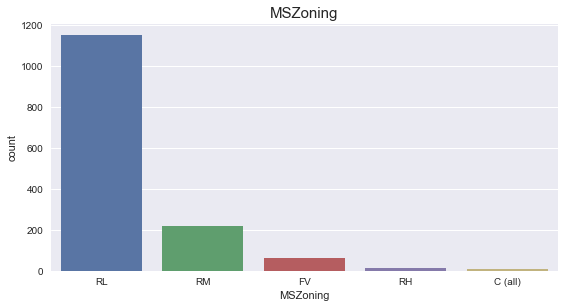

In [50]:
#Barchart for categorical variable
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(x='MSZoning', data=df_pd2, order=df_pd['MSZoning'].value_counts().index)
plt.title('MSZoning', fontsize=15)
plt.show()

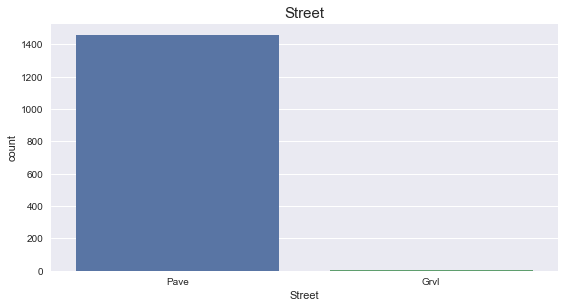

In [51]:
#Barchart for categorical variable
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(x='Street', data=df_pd2, order=df_pd['Street'].value_counts().index)
plt.title('Street', fontsize=15)
plt.show()

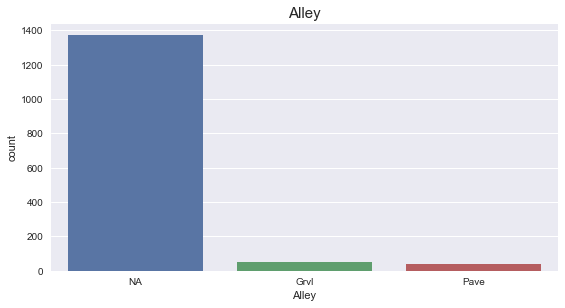

In [52]:
#Barchart for categorical variable
plt.figure(figsize=(20,10))
plt.subplot(221)
sns.countplot(x='Alley', data=df_pd2, order=df_pd['Alley'].value_counts().index)
plt.title('Alley', fontsize=15)
plt.show()

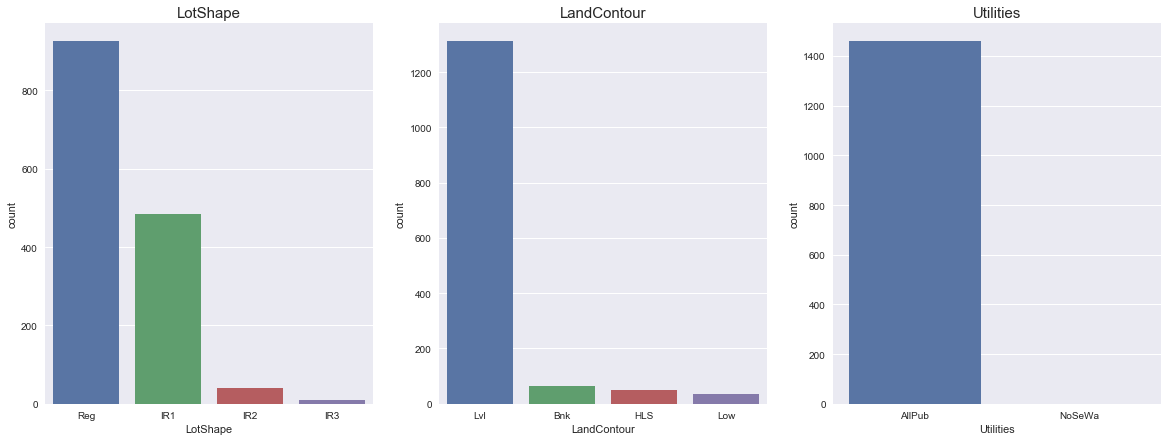

In [53]:
#Barchart for categorical variable
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='LotShape', data=df_pd2, order=df_pd['LotShape'].value_counts().index)
plt.title('LotShape', fontsize=15)
plt.subplot(132)
sns.countplot(x='LandContour', data=df_pd2, order=df_pd['LandContour'].value_counts().index)
plt.title('LandContour', fontsize=15)
plt.subplot(133)
sns.countplot(x='Utilities', data=df_pd2, order=df_pd['Utilities'].value_counts().index)
plt.title('Utilities', fontsize=15)
plt.show()

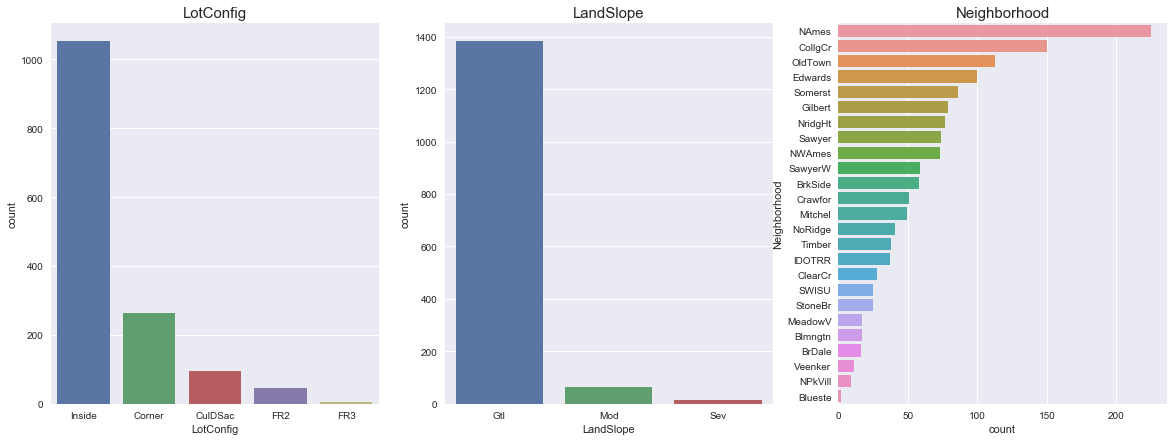

In [54]:
#Barchart for categorical variable
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='LotConfig', data=df_pd2, order=df_pd['LotConfig'].value_counts().index)
plt.title('LotConfig', fontsize=15)
plt.subplot(132)
sns.countplot(x='LandSlope', data=df_pd2, order=df_pd['LandSlope'].value_counts().index)
plt.title('LandSlope', fontsize=15)
plt.subplot(133)
sns.countplot(y='Neighborhood', data=df_pd2, order=df_pd['Neighborhood'].value_counts().index)
plt.title('Neighborhood', fontsize=15)
plt.show()

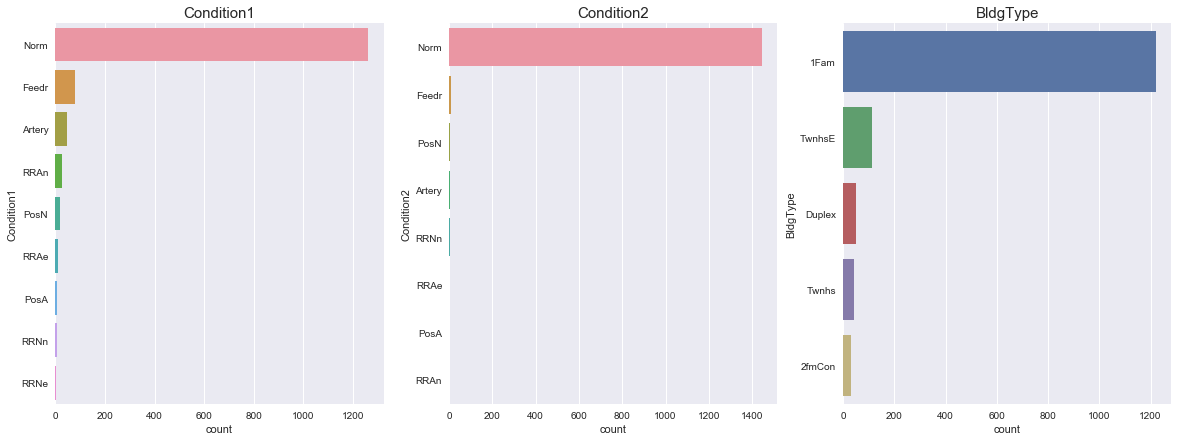

In [55]:
#Barchart for categorical variable
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='Condition1', data=df_pd2, order=df_pd['Condition1'].value_counts().index)
plt.title('Condition1', fontsize=15)
plt.subplot(132)
sns.countplot(y='Condition2', data=df_pd2, order=df_pd['Condition2'].value_counts().index)
plt.title('Condition2', fontsize=15)
plt.subplot(133)
sns.countplot(y='BldgType', data=df_pd2, order=df_pd['BldgType'].value_counts().index)
plt.title('BldgType', fontsize=15)
plt.show()

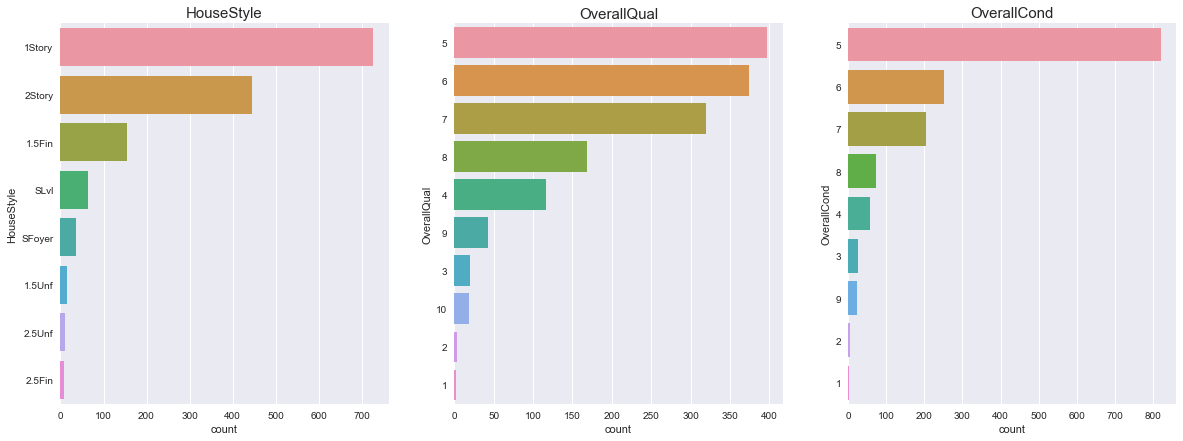

In [56]:
#Barchart for categorical variable
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='HouseStyle', data=df_pd2, order=df_pd['HouseStyle'].value_counts().index)
plt.title('HouseStyle', fontsize=15)
plt.subplot(132)
sns.countplot(y='OverallQual', data=df_pd2, order=df_pd['OverallQual'].value_counts().index)
plt.title('OverallQual', fontsize=15)
plt.subplot(133)
sns.countplot(y='OverallCond', data=df_pd2, order=df_pd['OverallCond'].value_counts().index)
plt.title('OverallCond', fontsize=15)
plt.show()

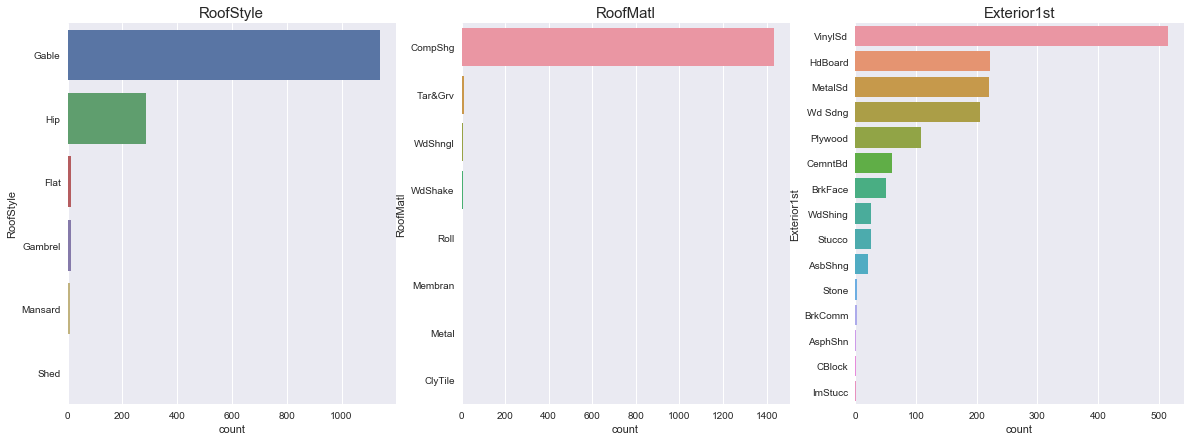

In [57]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='RoofStyle', data=df_pd2, order=df_pd['RoofStyle'].value_counts().index)
plt.title('RoofStyle', fontsize=15)
plt.subplot(132)
sns.countplot(y='RoofMatl', data=df_pd2, order=df_pd['RoofMatl'].value_counts().index)
plt.title('RoofMatl', fontsize=15)
plt.subplot(133)
sns.countplot(y='Exterior1st', data=df_pd2, order=df_pd['Exterior1st'].value_counts().index)
plt.title('Exterior1st', fontsize=15)
plt.show()

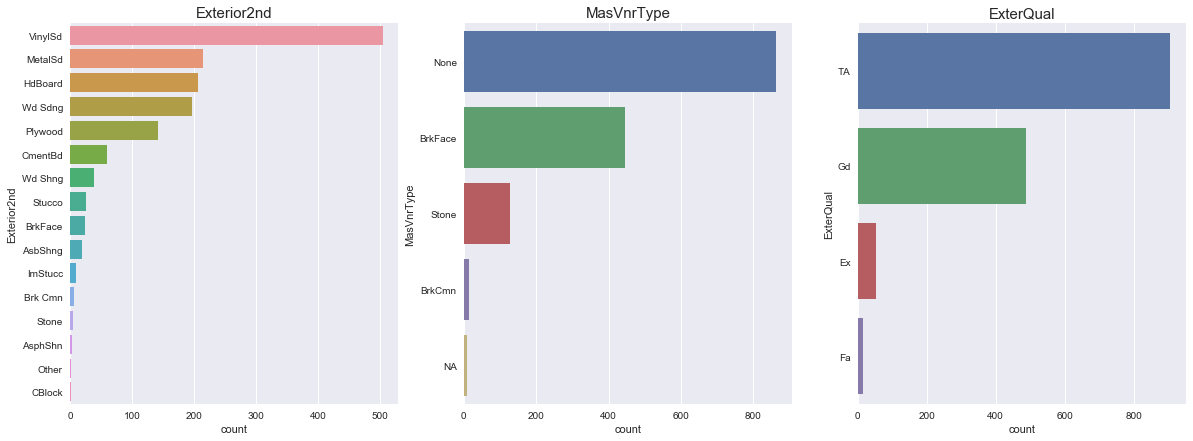

In [58]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='Exterior2nd', data=df_pd2, order=df_pd['Exterior2nd'].value_counts().index)
plt.title('Exterior2nd', fontsize=15)
plt.subplot(132)
sns.countplot(y='MasVnrType', data=df_pd2, order=df_pd['MasVnrType'].value_counts().index)
plt.title('MasVnrType', fontsize=15)
plt.subplot(133)
sns.countplot(y='ExterQual', data=df_pd2, order=df_pd['ExterQual'].value_counts().index)
plt.title('ExterQual', fontsize=15)
plt.show()

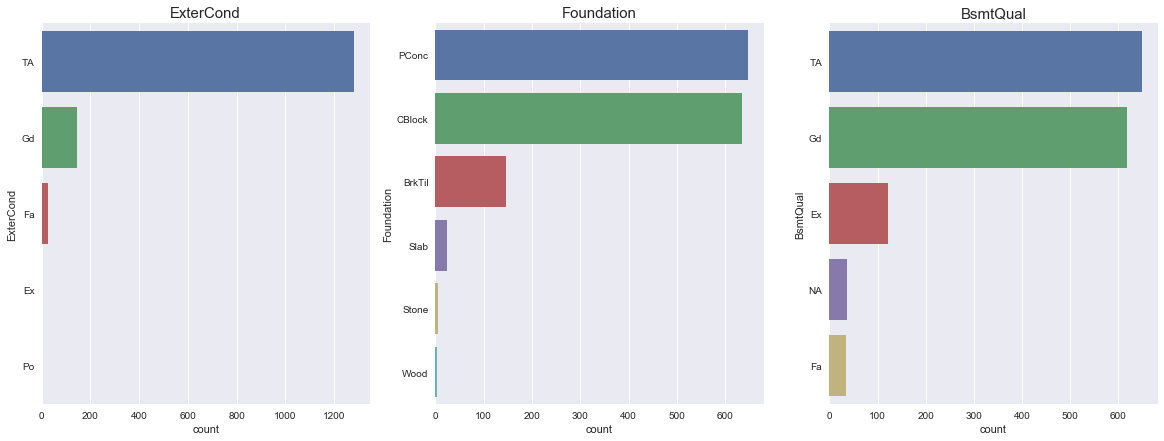

In [59]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='ExterCond', data=df_pd2, order=df_pd['ExterCond'].value_counts().index)
plt.title('ExterCond', fontsize=15)
plt.subplot(132)
sns.countplot(y='Foundation', data=df_pd2, order=df_pd['Foundation'].value_counts().index)
plt.title('Foundation', fontsize=15)
plt.subplot(133)
sns.countplot(y='BsmtQual', data=df_pd2, order=df_pd['BsmtQual'].value_counts().index)
plt.title('BsmtQual', fontsize=15)
plt.show()

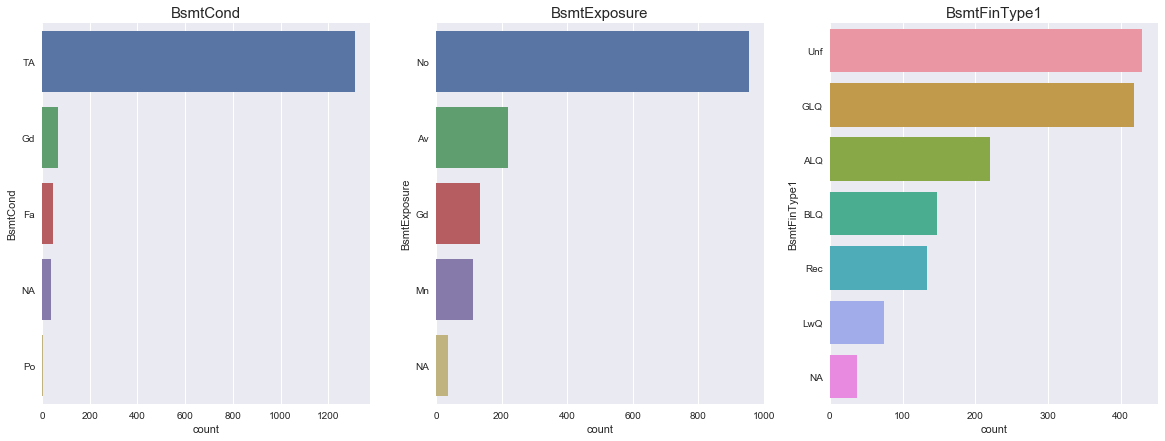

In [60]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='BsmtCond', data=df_pd2, order=df_pd['BsmtCond'].value_counts().index)
plt.title('BsmtCond', fontsize=15)
plt.subplot(132)
sns.countplot(y='BsmtExposure', data=df_pd2, order=df_pd['BsmtExposure'].value_counts().index)
plt.title('BsmtExposure', fontsize=15)
plt.subplot(133)
sns.countplot(y='BsmtFinType1', data=df_pd2, order=df_pd['BsmtFinType1'].value_counts().index)
plt.title('BsmtFinType1', fontsize=15)
plt.show()

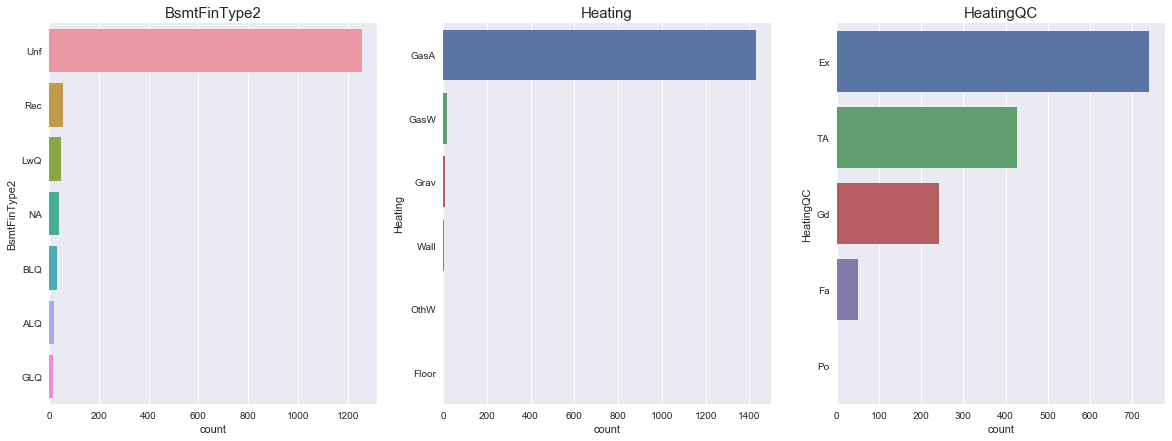

In [61]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='BsmtFinType2', data=df_pd2, order=df_pd['BsmtFinType2'].value_counts().index)
plt.title('BsmtFinType2', fontsize=15)
plt.subplot(132)
sns.countplot(y='Heating', data=df_pd2, order=df_pd['Heating'].value_counts().index)
plt.title('Heating', fontsize=15)
plt.subplot(133)
sns.countplot(y='HeatingQC', data=df_pd2, order=df_pd['HeatingQC'].value_counts().index)
plt.title('HeatingQC', fontsize=15)
plt.show()

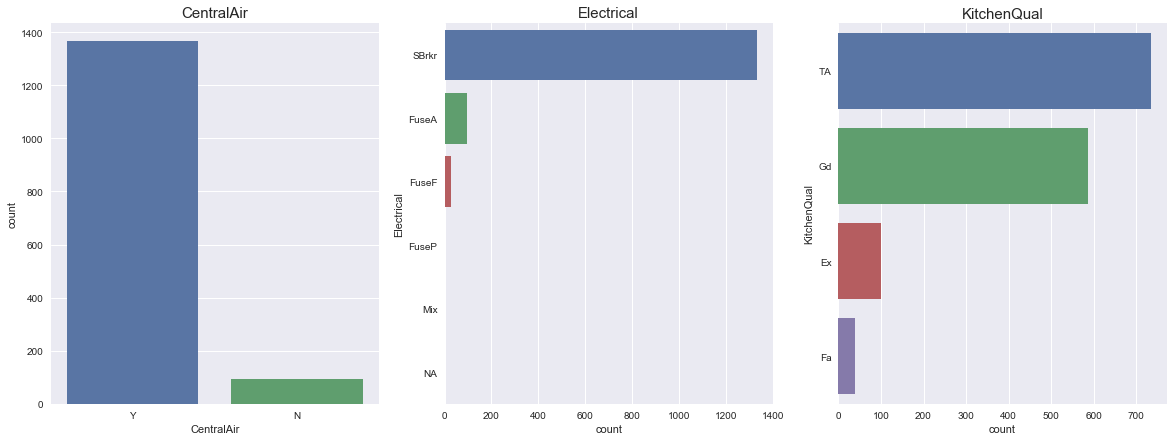

In [62]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='CentralAir', data=df_pd2, order=df_pd['CentralAir'].value_counts().index)
plt.title('CentralAir', fontsize=15)
plt.subplot(132)
sns.countplot(y='Electrical', data=df_pd2, order=df_pd['Electrical'].value_counts().index)
plt.title('Electrical', fontsize=15)
plt.subplot(133)
sns.countplot(y='KitchenQual', data=df_pd2, order=df_pd['KitchenQual'].value_counts().index)
plt.title('KitchenQual', fontsize=15)
plt.show()

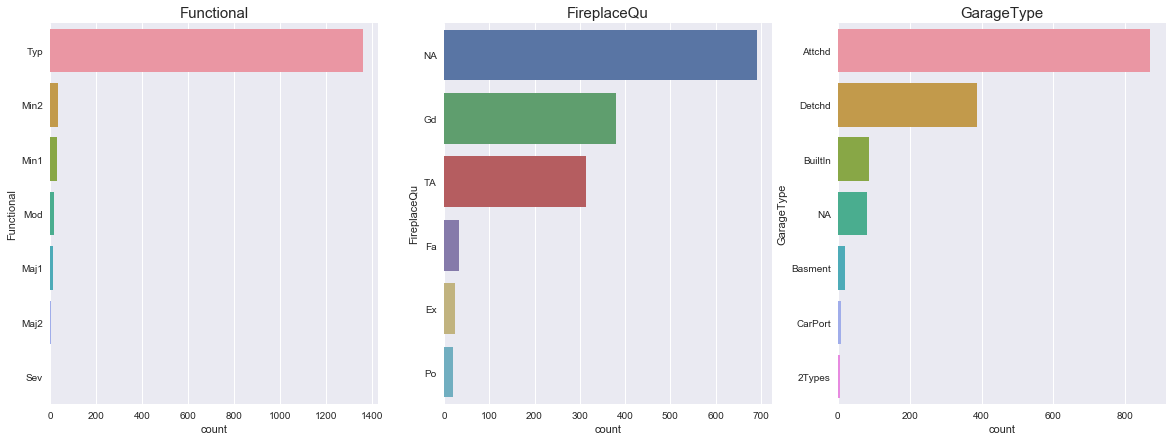

In [63]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='Functional', data=df_pd2, order=df_pd['Functional'].value_counts().index)
plt.title('Functional', fontsize=15)
plt.subplot(132)
sns.countplot(y='FireplaceQu', data=df_pd2, order=df_pd['FireplaceQu'].value_counts().index)
plt.title('FireplaceQu', fontsize=15)
plt.subplot(133)
sns.countplot(y='GarageType', data=df_pd2, order=df_pd['GarageType'].value_counts().index)
plt.title('GarageType', fontsize=15)
plt.show()

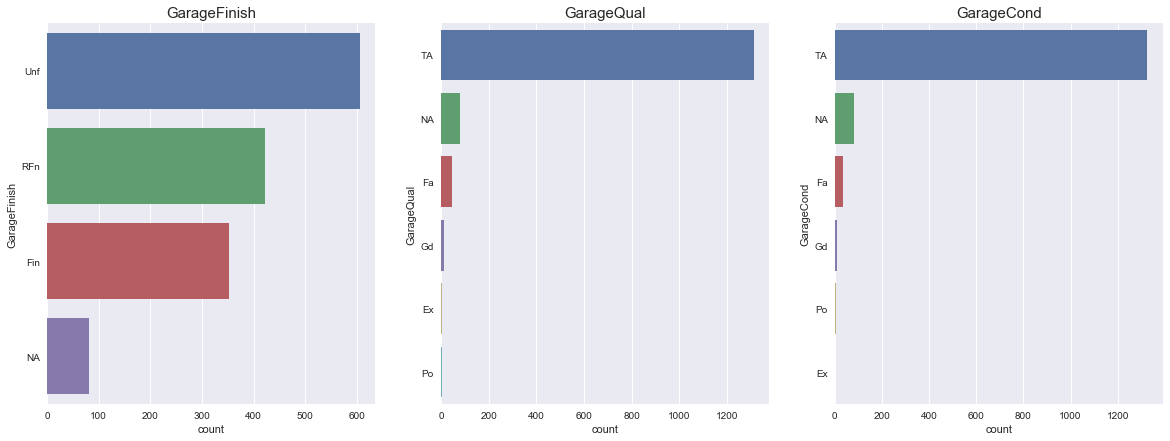

In [64]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(y='GarageFinish', data=df_pd2, order=df_pd['GarageFinish'].value_counts().index)
plt.title('GarageFinish', fontsize=15)
plt.subplot(132)
sns.countplot(y='GarageQual', data=df_pd2, order=df_pd['GarageQual'].value_counts().index)
plt.title('GarageQual', fontsize=15)
plt.subplot(133)
sns.countplot(y='GarageCond', data=df_pd2, order=df_pd['GarageCond'].value_counts().index)
plt.title('GarageCond', fontsize=15)
plt.show()

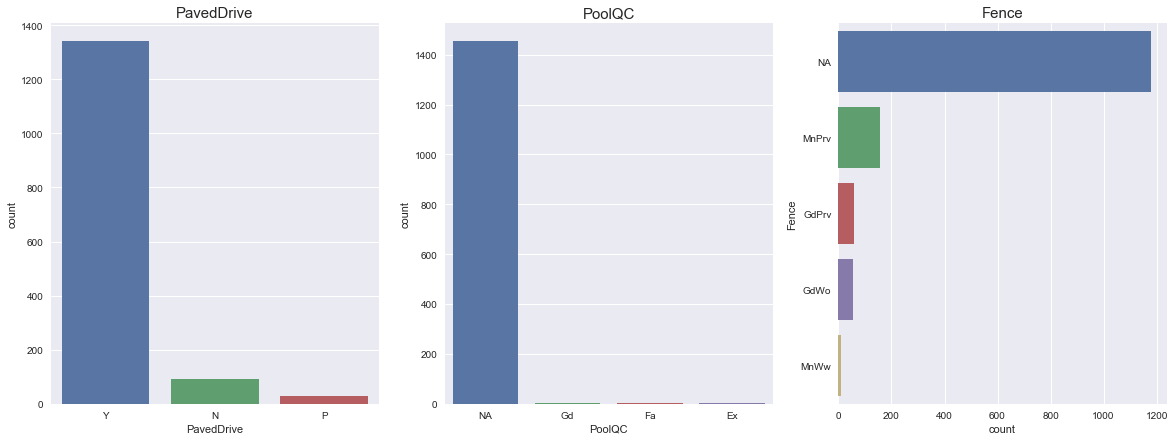

In [65]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='PavedDrive', data=df_pd2, order=df_pd['PavedDrive'].value_counts().index)
plt.title('PavedDrive', fontsize=15)
plt.subplot(132)
sns.countplot(x='PoolQC', data=df_pd2, order=df_pd['PoolQC'].value_counts().index)
plt.title('PoolQC', fontsize=15)
plt.subplot(133)
sns.countplot(y='Fence', data=df_pd2, order=df_pd['Fence'].value_counts().index)
plt.title('Fence', fontsize=15)
plt.show()

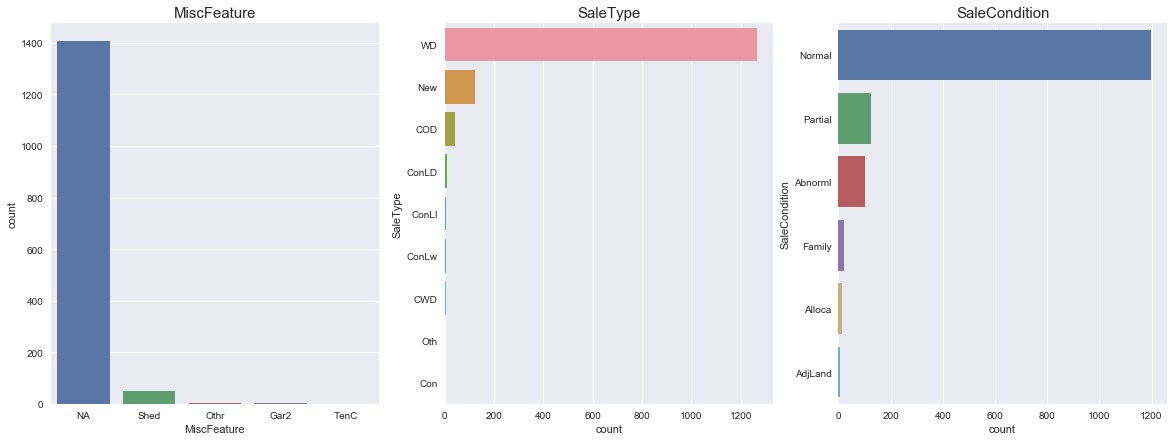

In [66]:
plt.figure(figsize=(20,7))
plt.subplot(131)
sns.countplot(x='MiscFeature', data=df_pd2, order=df_pd['MiscFeature'].value_counts().index)
plt.title('MiscFeature', fontsize=15)
plt.subplot(132)
sns.countplot(y='SaleType', data=df_pd2, order=df_pd['SaleType'].value_counts().index)
plt.title('SaleType', fontsize=15)
plt.subplot(133)
sns.countplot(y='SaleCondition', data=df_pd2, order=df_pd['SaleCondition'].value_counts().index)
plt.title('SaleCondition', fontsize=15)
plt.show()

### Insignificant Categories in Data train

From visualization above we can see, there are much categories with minimal number let's say under 7 from total observations 1460. Those minimal numbers of categories called insignificant categories and will replace with the largest numbers of catories in each categorical columns.


In [51]:
threshold=97
threshold2=0.7

In [52]:
def replace_cat2(f,cols):
    """input are dataframe and categorical variables, replace insignificant categories (percentage <=0.7) with largest number
    of catgories and output is new dataframe """
    df_percent=f.groupBy(cols).count().sort(col("count").desc())\
                .withColumn('total',sum(col('count')).over(window))\
                .withColumn('Percent',col('count')*100/col('total')) #calculate the percentage-save in Percent columns from each categories
    dominant_cat=df_percent.select(df_percent['Percent']).collect()[0][0] #calculate the highest percentage of category
    count_dist=f.select([cols]).distinct().count() #calculate distinct values in that columns
    if count_dist > 2 and dominant_cat <= threshold :
        print('column:', cols)
        cols_names.append(cols)  #combine with previous list
        replacement=f.groupBy(cols).count().sort(col("count").desc()).collect()[0][0] #define dominant category 
        print("replacement:",replacement)
        replacing.append(replacement) #combine with previous list
        insign_cat=df_percent.filter(df_percent['Percent']< threshold2).select(df_percent[cols]).collect() #calculate insignificant categories
        insign_cat=[r[cols] for r in insign_cat] #just take the values
        category.append(insign_cat) #combine with previous list
        print("insign_cat:",insign_cat)
        f=f.replace(insign_cat,replacement, cols) #replace insignificant categories with dominant categories
    return f

In [53]:
df_percent=df_final.groupBy('Condition1').count().sort(col("count").desc())\
                    .withColumn('total',sum(col('count')).over(window))\
                    .withColumn('Percent',col('count')*100/col('total')) #calculate the percentage-save in Percent columns from each categories
df_percent.show()
#dominant_cat=df_percent.select(df_percent['Percent']).collect()[0][0]
#dominant_cat

+----------+-----+-----+------------------+
|Condition1|count|total|           Percent|
+----------+-----+-----+------------------+
|      Norm| 1260| 1460|  86.3013698630137|
|     Feedr|   81| 1460|5.5479452054794525|
|    Artery|   48| 1460| 3.287671232876712|
|      RRAn|   26| 1460|1.7808219178082192|
|      PosN|   19| 1460|1.3013698630136987|
|      RRAe|   11| 1460|0.7534246575342466|
|      PosA|    8| 1460| 0.547945205479452|
|      RRNn|    5| 1460|0.3424657534246575|
|      RRNe|    2| 1460| 0.136986301369863|
+----------+-----+-----+------------------+



In [54]:
#call function replacing insignificant categories 
replacing=[]
cols_names=[]
category=[]
for cols in cat_cols:
    df_final=replace_cat2(df_final,cols)

column: MSZoning
replacement: RL
insign_cat: ['C (all)']
column: Alley
replacement: NA
insign_cat: []
column: LotShape
replacement: Reg
insign_cat: ['IR3']
column: LandContour
replacement: Lvl
insign_cat: []
column: LotConfig
replacement: Inside
insign_cat: ['FR3']
column: LandSlope
replacement: Gtl
insign_cat: []
column: Neighborhood
replacement: NAmes
insign_cat: ['NPkVill', 'Blueste']
column: Condition1
replacement: Norm
insign_cat: ['PosA', 'RRNn', 'RRNe']
column: BldgType
replacement: 1Fam
insign_cat: []
column: HouseStyle
replacement: 1Story
insign_cat: ['2.5Fin']
column: OverallQual
replacement: 5
insign_cat: ['2', '1']
column: OverallCond
replacement: 5
insign_cat: ['2', '1']
column: RoofStyle
replacement: Gable
insign_cat: ['Mansard', 'Shed']
column: Exterior1st
replacement: VinylSd
insign_cat: ['Stone', 'BrkComm', 'AsphShn', 'ImStucc', 'CBlock']
column: Exterior2nd
replacement: VinylSd
insign_cat: ['ImStucc', 'Brk Cmn', 'Stone', 'AsphShn', 'Other', 'CBlock']
column: MasVnrTyp

In [55]:
type(df_final)

pyspark.sql.dataframe.DataFrame

In [56]:
#check length in list cols_names, category and replacing
len(cols_names), len(category), len(replacing)

(38, 38, 38)

From **replace_cat2** function above we got 3 list,  are:
1. list of columns, actually this list same with list categorical columns --> cols_names
2. list of replaced categories --> category
3. list of replacing categories --> replacing

Those three list will be created into dataframe called **g**.

In [57]:
#Create dataframe of replaced categories
g=spark.createDataFrame(list(zip(cols_names, replacing, category)),['cols_names', 'replacing', 'category'])
g.show(9)

+------------+---------+------------------+
|  cols_names|replacing|          category|
+------------+---------+------------------+
|    MSZoning|       RL|         [C (all)]|
|       Alley|       NA|                []|
|    LotShape|      Reg|             [IR3]|
| LandContour|      Lvl|                []|
|   LotConfig|   Inside|             [FR3]|
|   LandSlope|      Gtl|                []|
|Neighborhood|    NAmes|[NPkVill, Blueste]|
|  Condition1|     Norm|[PosA, RRNn, RRNe]|
|    BldgType|     1Fam|                []|
+------------+---------+------------------+
only showing top 9 rows



In [58]:
g.dtypes

[('cols_names', 'string'),
 ('replacing', 'string'),
 ('category', 'array<string>')]

In [59]:
g.printSchema()

root
 |-- cols_names: string (nullable = true)
 |-- replacing: string (nullable = true)
 |-- category: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [60]:
f_percent=df_final.groupBy('MSZoning').count().sort(col("count").desc())\
                       .withColumn('total',sum(col('count')).over(window))\
                       .withColumn('Percent',col('count')*100/col('total'))

In [61]:
f_percent.show()

+--------+-----+-----+------------------+
|MSZoning|count|total|           Percent|
+--------+-----+-----+------------------+
|      RL| 1161| 1460| 79.52054794520548|
|      RM|  218| 1460|14.931506849315069|
|      FV|   65| 1460|4.4520547945205475|
|      RH|   16| 1460| 1.095890410958904|
+--------+-----+-----+------------------+



### Replacing Insignificant Categories in data test

we already have a dataframe containing any categories that need to be replaced, we got it when the process of replacing the insignificant categories in the data train, the data frame is called **g**. Based on those information, insignificant categories on data test will be replaced.

In [62]:
#view g dataframe
g.show(15)

+------------+---------+--------------------+
|  cols_names|replacing|            category|
+------------+---------+--------------------+
|    MSZoning|       RL|           [C (all)]|
|       Alley|       NA|                  []|
|    LotShape|      Reg|               [IR3]|
| LandContour|      Lvl|                  []|
|   LotConfig|   Inside|               [FR3]|
|   LandSlope|      Gtl|                  []|
|Neighborhood|    NAmes|  [NPkVill, Blueste]|
|  Condition1|     Norm|  [PosA, RRNn, RRNe]|
|    BldgType|     1Fam|                  []|
|  HouseStyle|   1Story|            [2.5Fin]|
| OverallQual|        5|              [2, 1]|
| OverallCond|        5|              [2, 1]|
|   RoofStyle|    Gable|     [Mansard, Shed]|
| Exterior1st|  VinylSd|[Stone, BrkComm, ...|
| Exterior2nd|  VinylSd|[ImStucc, Brk Cmn...|
+------------+---------+--------------------+
only showing top 15 rows



In [63]:
cols_names_list=g.select('cols_names').collect() #select just cols_names from dataframe g
cols_names_list=[r['cols_names'] for r in cols_names_list] #take just the values
for z in cols_names_list:
    print('cols_names:',z)
    replacement_cat=g.filter(g['cols_names']== z).select(g['replacing']).collect()[0][0] #select values of replacing columns accoring to z in cols_names 
    print('replacement_cat:', replacement_cat)
    insignificant_cat=g.filter(g['cols_names']== z).select(g['category']).collect()[0][0] #select values of category columns accoring to z in cols_names
    print('insignificant_cat:',insignificant_cat)
    test_data=test_data.replace(insignificant_cat,replacement_cat, z) #replace insignificant cat with replacement value

cols_names: MSZoning
replacement_cat: RL
insignificant_cat: ['C (all)']
cols_names: Alley
replacement_cat: NA
insignificant_cat: []
cols_names: LotShape
replacement_cat: Reg
insignificant_cat: ['IR3']
cols_names: LandContour
replacement_cat: Lvl
insignificant_cat: []
cols_names: LotConfig
replacement_cat: Inside
insignificant_cat: ['FR3']
cols_names: LandSlope
replacement_cat: Gtl
insignificant_cat: []
cols_names: Neighborhood
replacement_cat: NAmes
insignificant_cat: ['NPkVill', 'Blueste']
cols_names: Condition1
replacement_cat: Norm
insignificant_cat: ['PosA', 'RRNn', 'RRNe']
cols_names: BldgType
replacement_cat: 1Fam
insignificant_cat: []
cols_names: HouseStyle
replacement_cat: 1Story
insignificant_cat: ['2.5Fin']
cols_names: OverallQual
replacement_cat: 5
insignificant_cat: ['2', '1']
cols_names: OverallCond
replacement_cat: 5
insignificant_cat: ['2', '1']
cols_names: RoofStyle
replacement_cat: Gable
insignificant_cat: ['Mansard', 'Shed']
cols_names: Exterior1st
replacement_cat: Vi

In [64]:
percent=df_final.groupBy('Exterior1st').count().sort(col("count").desc())\
                       .withColumn('total',sum(col('count')).over(window))\
                       .withColumn('Percent',col('count')*100/col('total'))
percent.show()

+-----------+-----+-----+------------------+
|Exterior1st|count|total|           Percent|
+-----------+-----+-----+------------------+
|    VinylSd|  522| 1460| 35.75342465753425|
|    HdBoard|  222| 1460|15.205479452054794|
|    MetalSd|  220| 1460|15.068493150684931|
|    Wd Sdng|  206| 1460| 14.10958904109589|
|    Plywood|  108| 1460| 7.397260273972603|
|    CemntBd|   61| 1460| 4.178082191780822|
|    BrkFace|   50| 1460|3.4246575342465753|
|    WdShing|   26| 1460|1.7808219178082192|
|     Stucco|   25| 1460|1.7123287671232876|
|    AsbShng|   20| 1460|  1.36986301369863|
+-----------+-----+-----+------------------+



In [65]:
f_percent=test_data.groupBy('Exterior1st').count().sort(col("count").desc())\
                       .withColumn('total',sum(col('count')).over(window))\
                       .withColumn('Percent',col('count')*100/col('total'))
f_percent.show()

+-----------+-----+-----+------------------+
|Exterior1st|count|total|           Percent|
+-----------+-----+-----+------------------+
|    VinylSd|  517| 1459| 35.43522960932145|
|    MetalSd|  230| 1459|15.764222069910899|
|    HdBoard|  220| 1459|15.078821110349555|
|    Wd Sdng|  205| 1459| 14.05071967100754|
|    Plywood|  113| 1459|  7.74503084304318|
|    CemntBd|   65| 1459| 4.455106237148732|
|    BrkFace|   37| 1459|2.5359835503769705|
|    WdShing|   30| 1459|2.0562028786840303|
|    AsbShng|   24| 1459|1.6449623029472242|
|     Stucco|   18| 1459|1.2337217272104182|
+-----------+-----+-----+------------------+



#### Numerical Variables

We have 34 numerical columns, they are:

num_cols: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [86]:
len(num_cols)

34

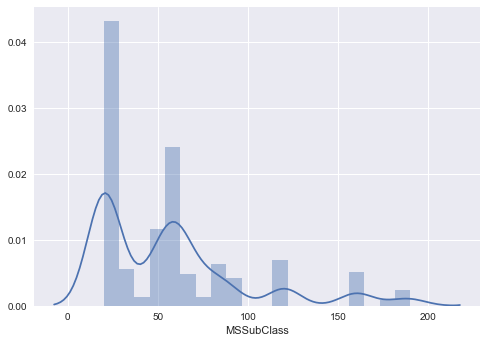

In [87]:
#distribusi of MSSubClass
sns.distplot(df_pd2['MSSubClass'])
plt.show()

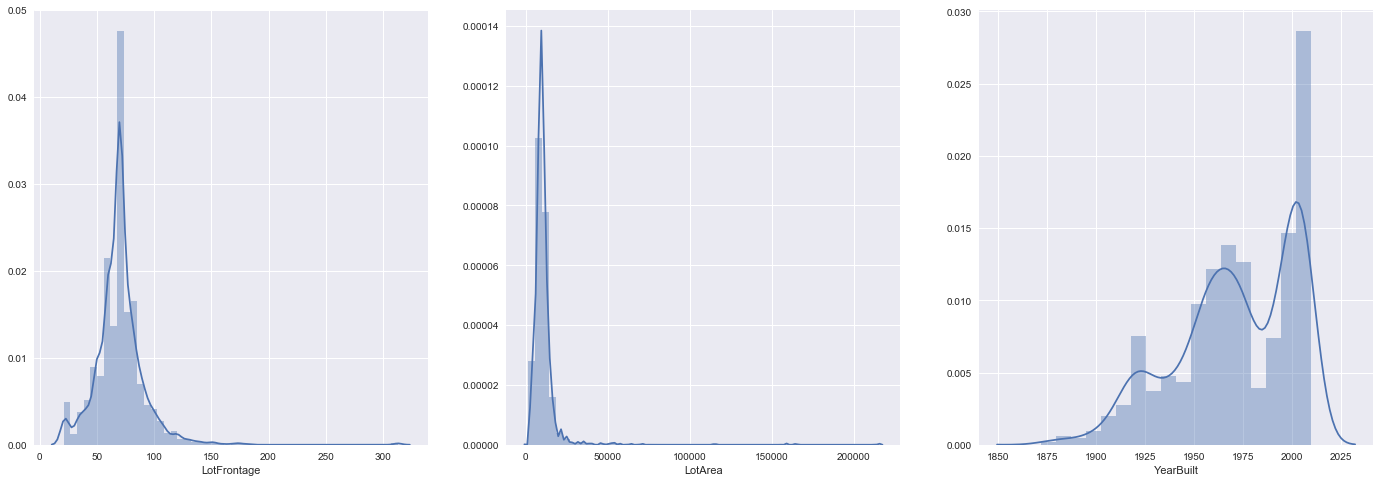

In [88]:
#distribusi of LotFrontage, LotArea and YearBuilt
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['LotFrontage'])
plt.subplot(132)
sns.distplot(df_pd2['LotArea'])
plt.subplot(133)
sns.distplot(df_pd2['YearBuilt'])
plt.show()

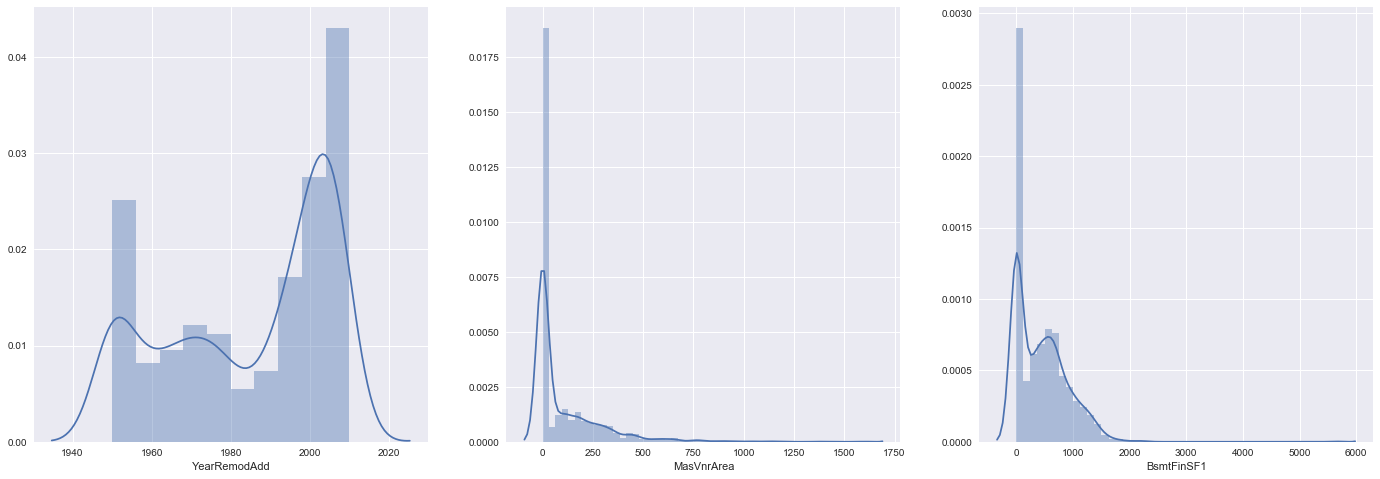

In [89]:
#distribusi of BsmtFinSF1, MasVnrArea and YearRemodAdd
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['YearRemodAdd'])
plt.subplot(132)
sns.distplot(df_pd2['MasVnrArea'])
plt.subplot(133)
sns.distplot(df_pd2['BsmtFinSF1'])
plt.show()

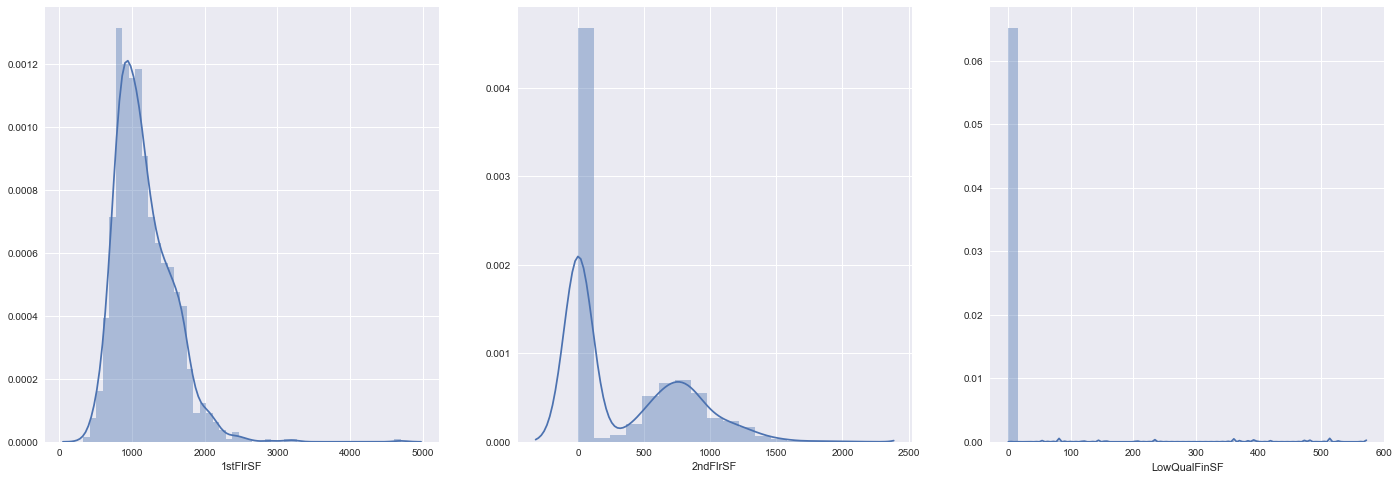

In [90]:
#distribusi of 1stFlrSF, 2ndFlrSF and LowQualFinSF
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['1stFlrSF'])
plt.subplot(132)
sns.distplot(df_pd2['2ndFlrSF'])
plt.subplot(133)
sns.distplot(df_pd2['LowQualFinSF'])
plt.show()

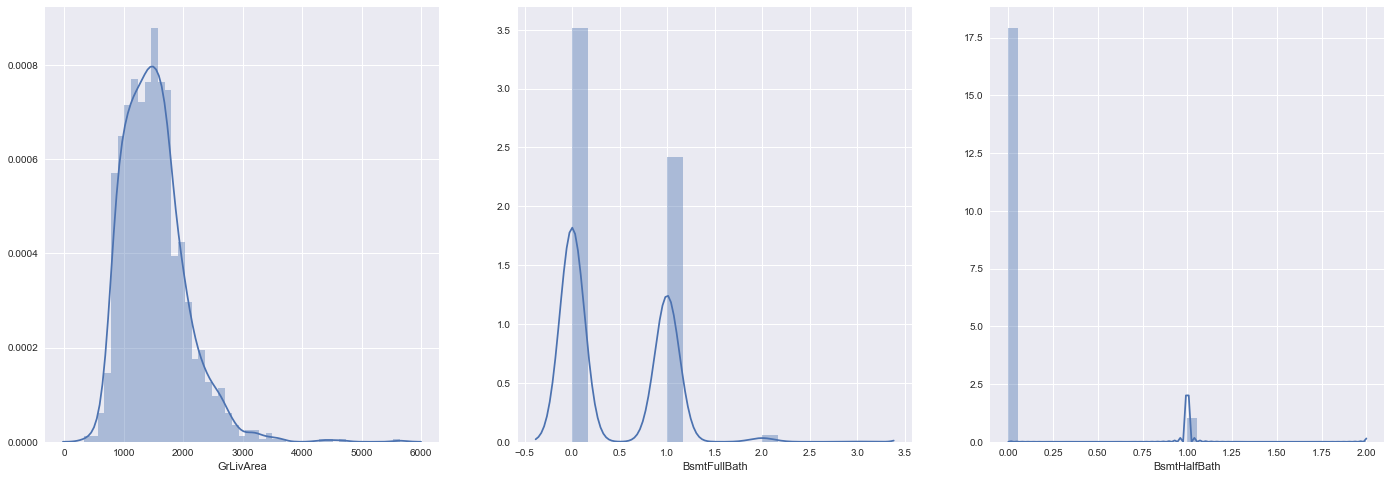

In [91]:
#distribusi of GrLivArea, BsmtFullBath and BsmtHalfBath
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['GrLivArea'])
plt.subplot(132)
sns.distplot(df_pd2['BsmtFullBath'])
plt.subplot(133)
sns.distplot(df_pd2['BsmtHalfBath'])
plt.show()

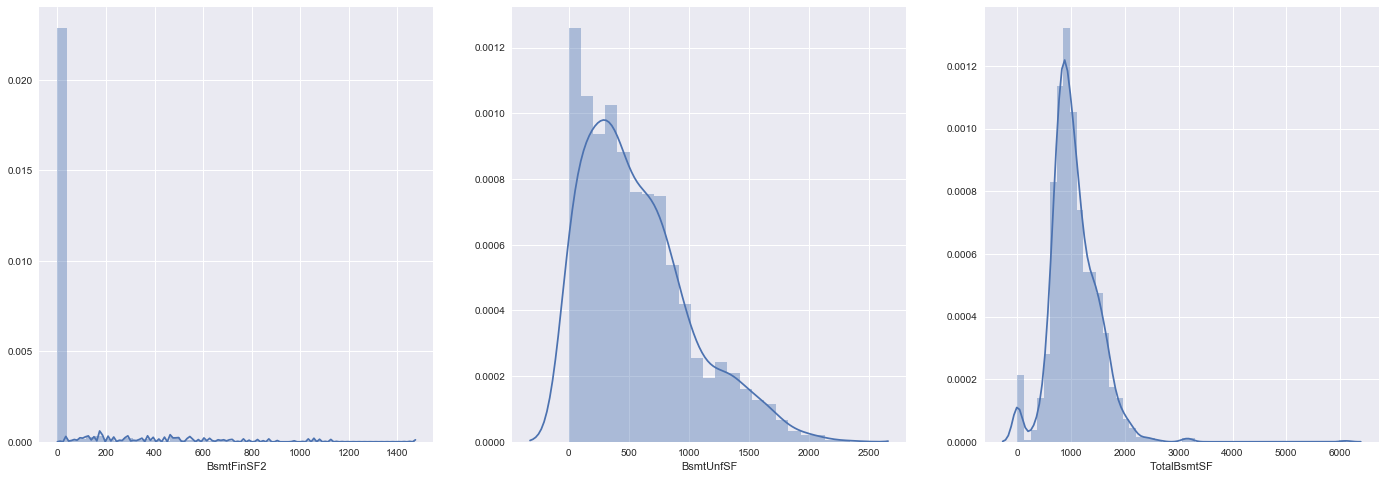

In [92]:
#distribusi of BsmtFinSF2, BsmtUnfSF and TotalBsmtSF
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['BsmtFinSF2'])
plt.subplot(132)
sns.distplot(df_pd2['BsmtUnfSF'])
plt.subplot(133)
sns.distplot(df_pd2['TotalBsmtSF'])
plt.show()

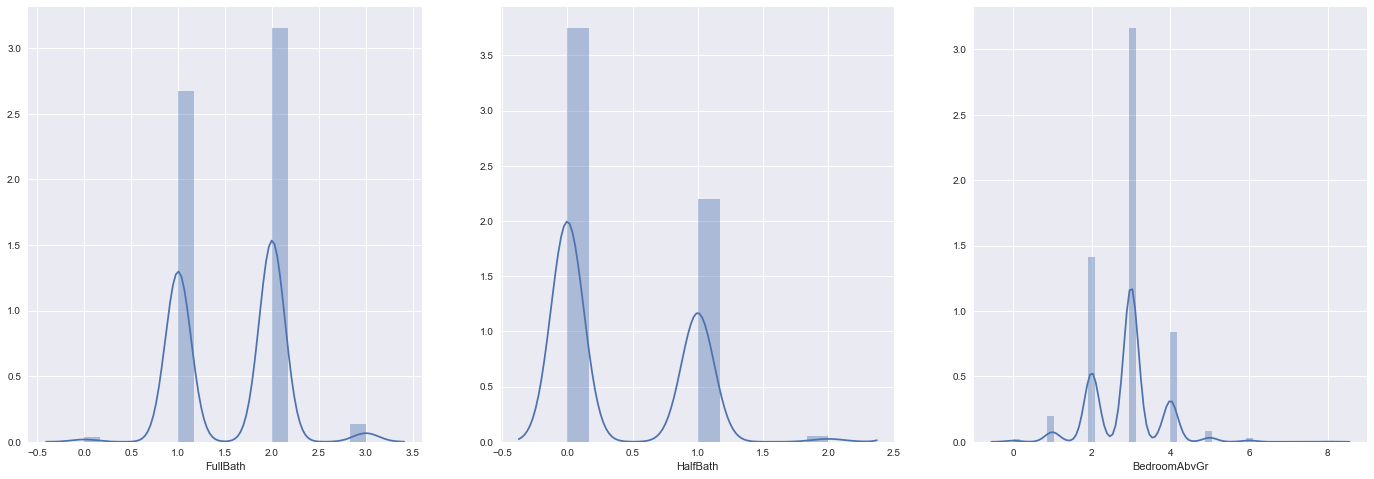

In [93]:
#distribusi of FullBath, HalfBath and BedroomAbvGr
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['FullBath'])
plt.subplot(132)
sns.distplot(df_pd2['HalfBath'])
plt.subplot(133)
sns.distplot(df_pd2['BedroomAbvGr'])
plt.show()

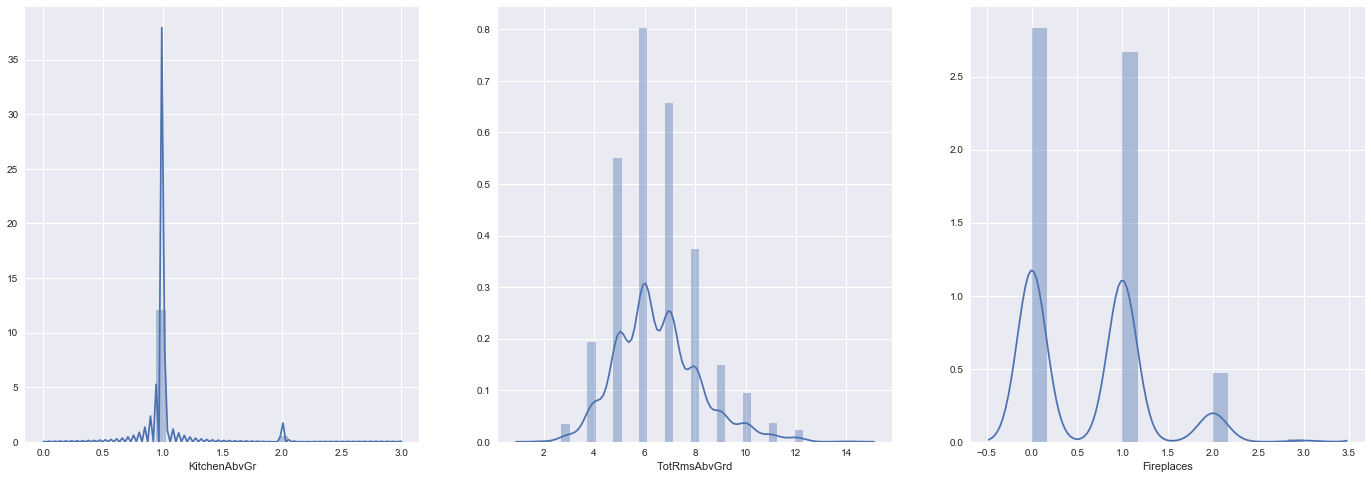

In [94]:
#distribusi of KitchenAbvGr, TotRmsAbvGrd and Fireplaces
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['KitchenAbvGr'])
plt.subplot(132)
sns.distplot(df_pd2['TotRmsAbvGrd'])
plt.subplot(133)
sns.distplot(df_pd2['Fireplaces'])
plt.show()

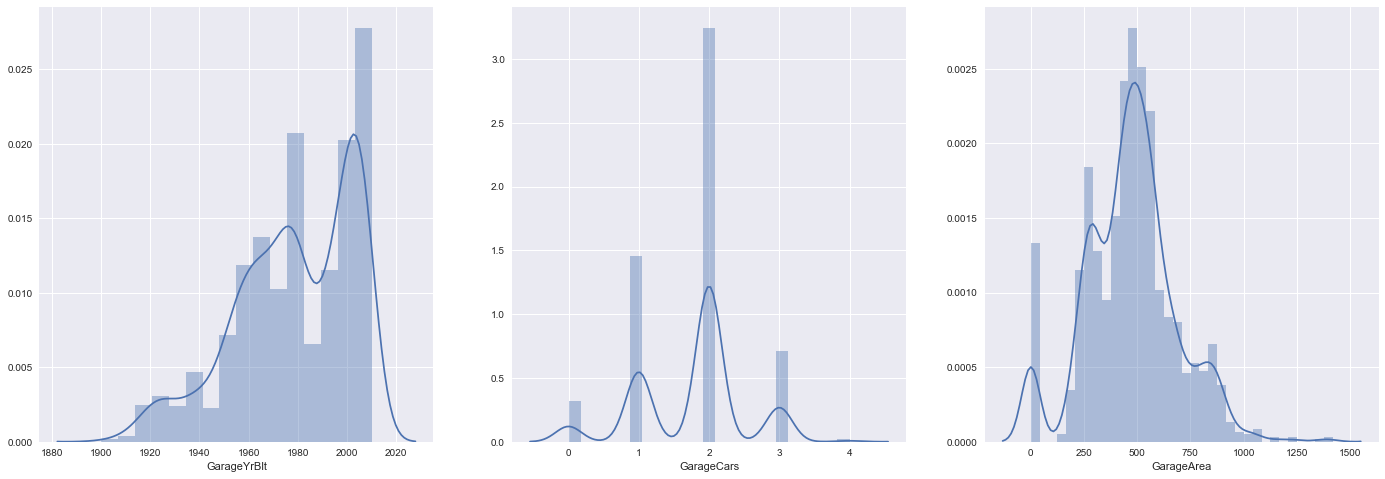

In [95]:
#distribusi of GarageYrBlt, GarageCars and GarageArea
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['GarageYrBlt'])
plt.subplot(132)
sns.distplot(df_pd2['GarageCars'])
plt.subplot(133)
sns.distplot(df_pd2['GarageArea'])
plt.show()

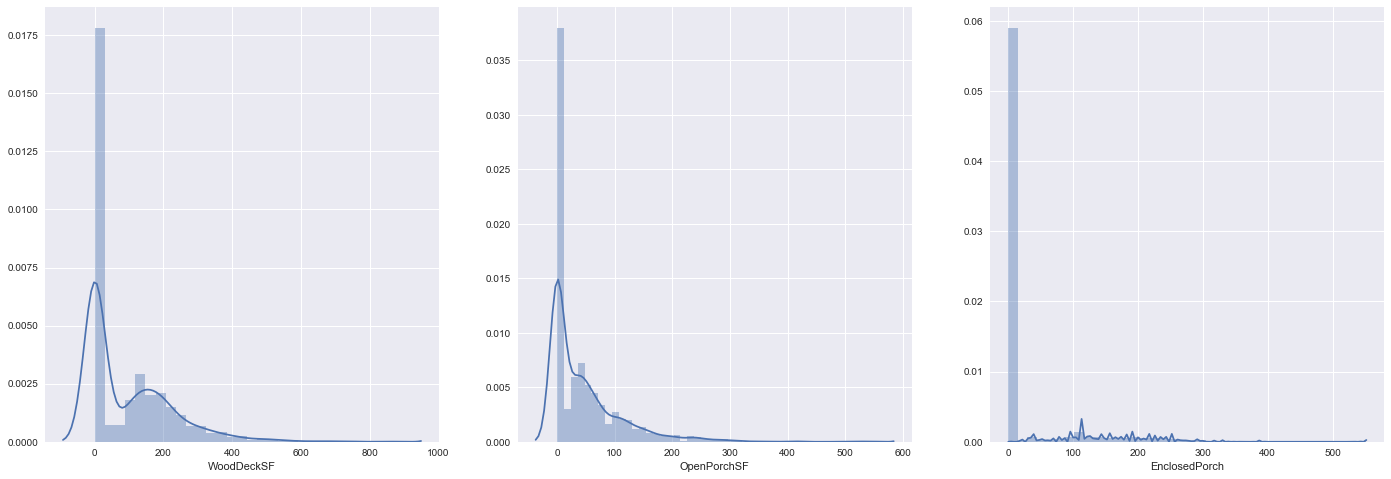

In [96]:
#distribusi of WoodDeckSF, OpenPorchSF and EnclosedPorch
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['WoodDeckSF'])
plt.subplot(132)
sns.distplot(df_pd2['OpenPorchSF'])
plt.subplot(133)
sns.distplot(df_pd2['EnclosedPorch'])
plt.show()

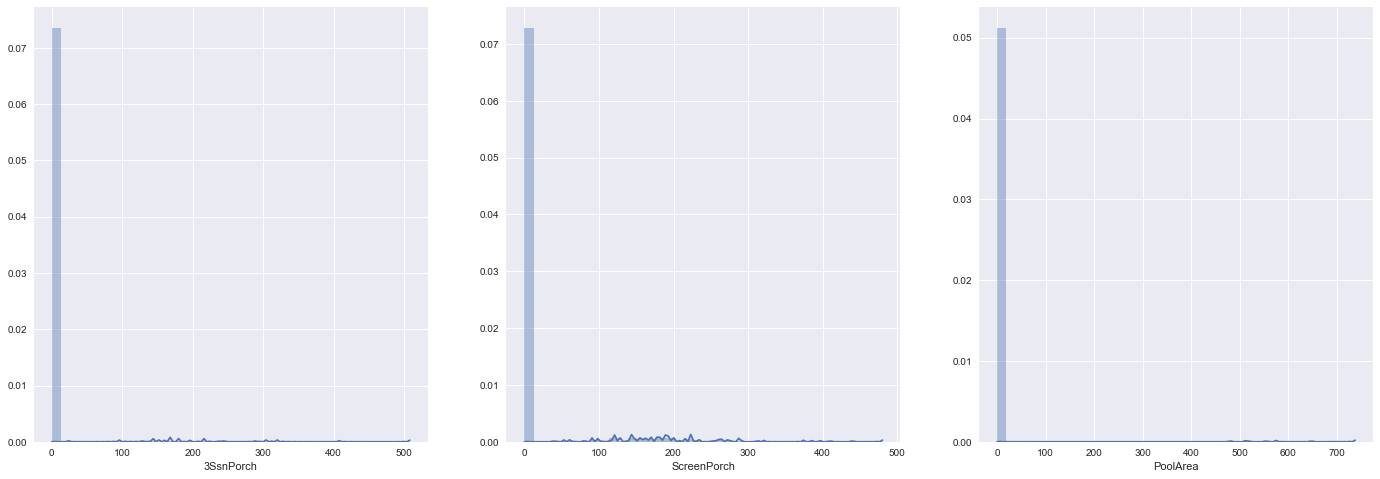

In [97]:
#distribusi of 3SsnPorch, ScreenPorch and PoolArea
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['3SsnPorch'])
plt.subplot(132)
sns.distplot(df_pd2['ScreenPorch'])
plt.subplot(133)
sns.distplot(df_pd2['PoolArea'])
plt.show()

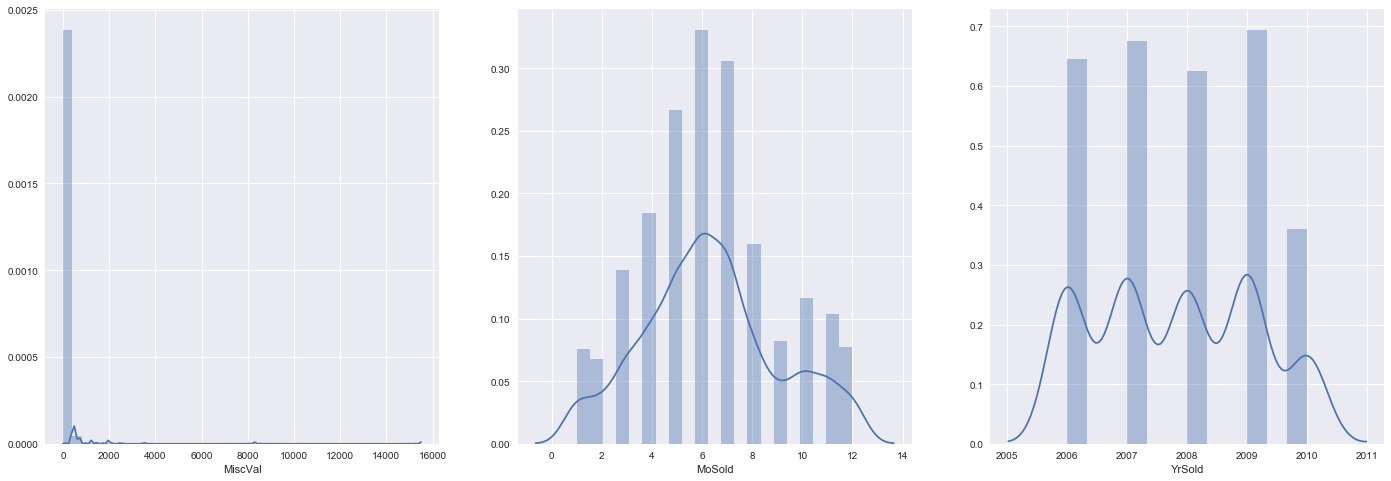

In [98]:
#distribusi of MiscVal, MoSold and YrSold
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.distplot(df_pd2['MiscVal'])
plt.subplot(132)
sns.distplot(df_pd2['MoSold'])
plt.subplot(133)
sns.distplot(df_pd2['YrSold'])
plt.show()

### Check outlier

We will check outlier in all numerical variables

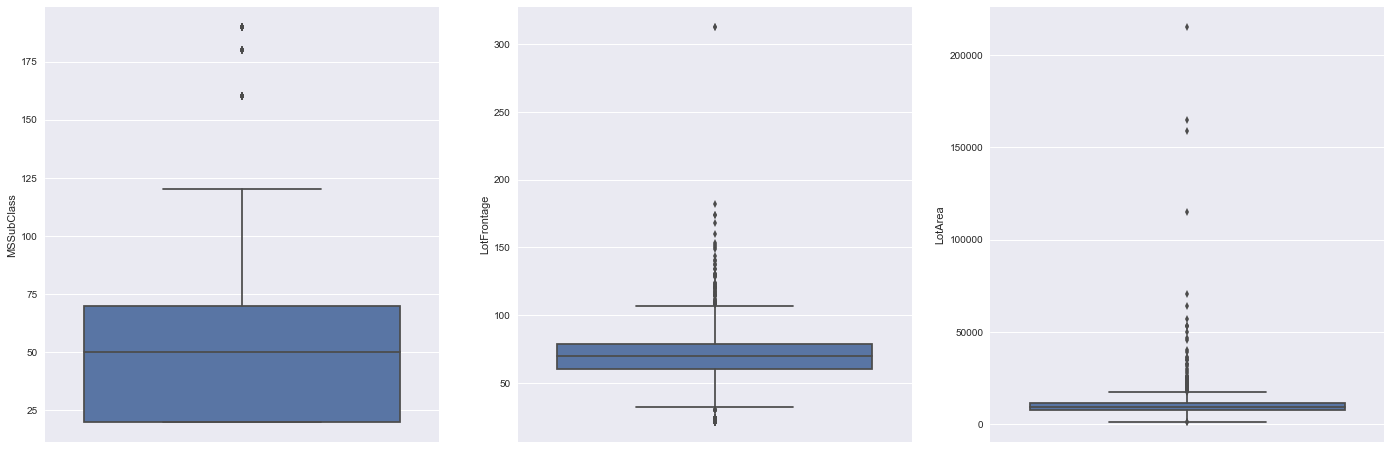

In [99]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="MSSubClass",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="LotFrontage",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="LotArea",data=df_pd2)
plt.show()

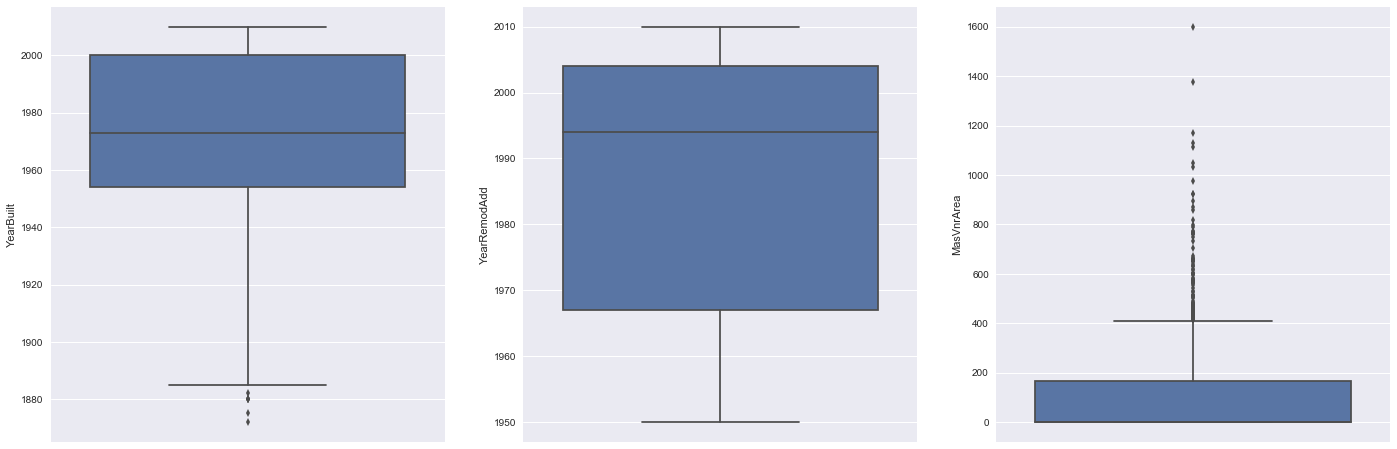

In [100]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="YearBuilt",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="YearRemodAdd",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="MasVnrArea",data=df_pd2)
plt.show()

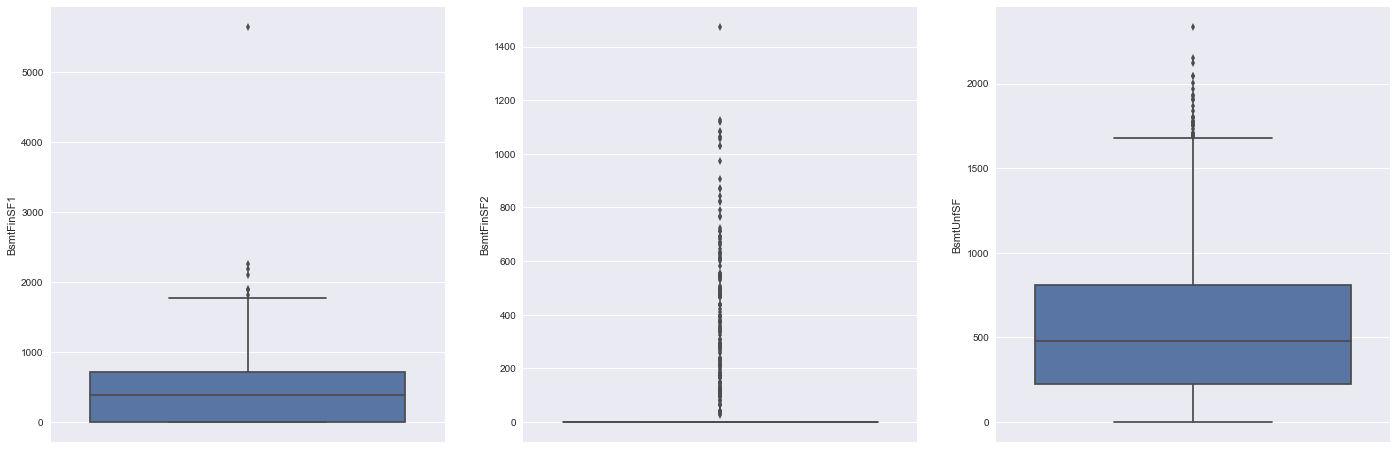

In [101]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="BsmtFinSF1",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="BsmtFinSF2",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="BsmtUnfSF",data=df_pd2)
plt.show()

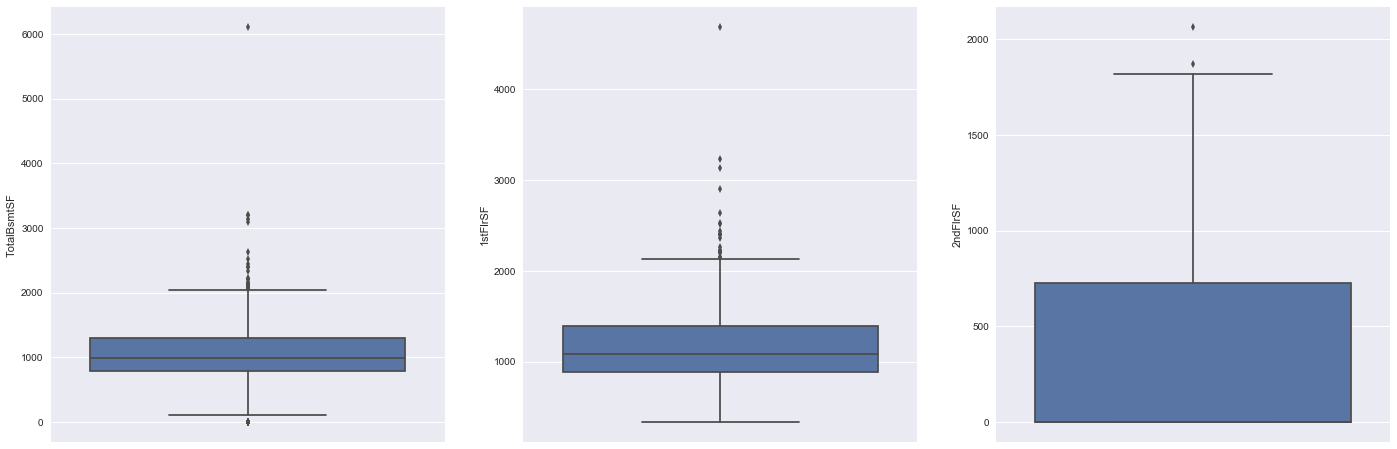

In [102]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="TotalBsmtSF",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="1stFlrSF",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="2ndFlrSF",data=df_pd2)
plt.show()

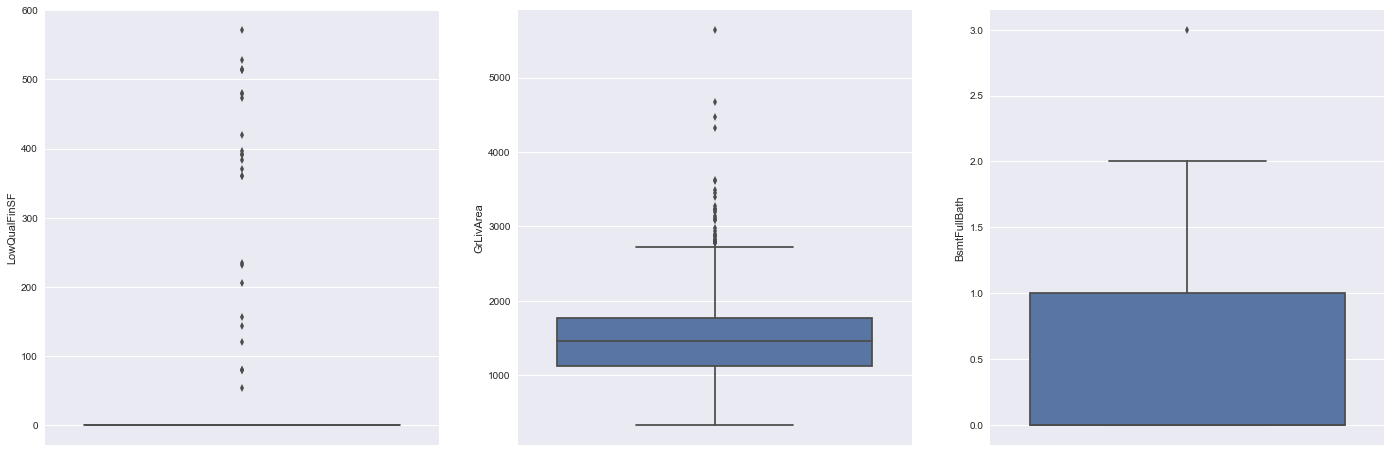

In [103]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="LowQualFinSF",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="GrLivArea",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="BsmtFullBath",data=df_pd2)
plt.show()

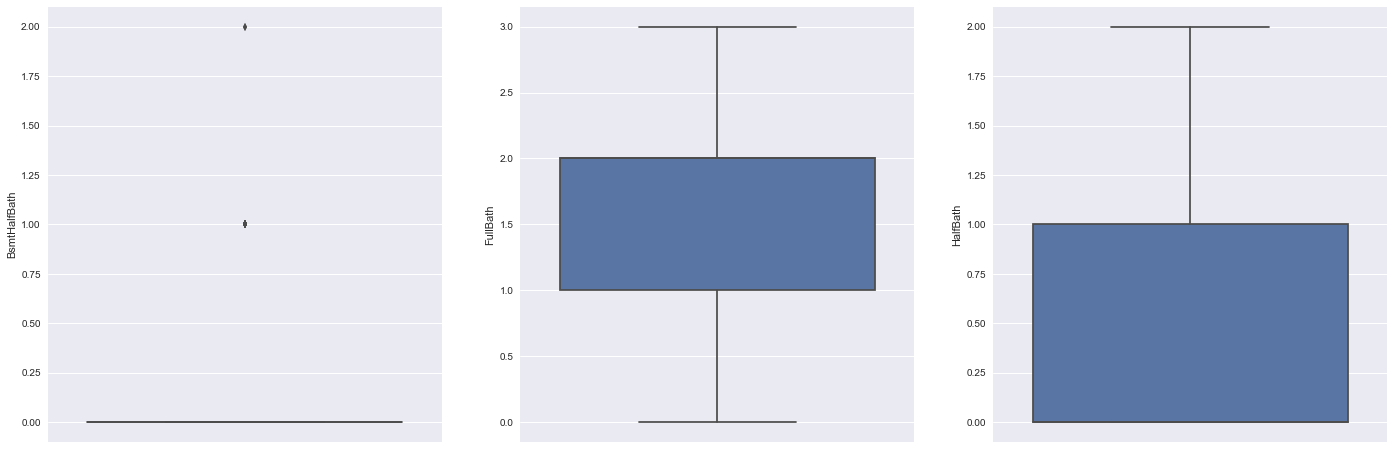

In [104]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="BsmtHalfBath",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="FullBath",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="HalfBath",data=df_pd2)
plt.show()

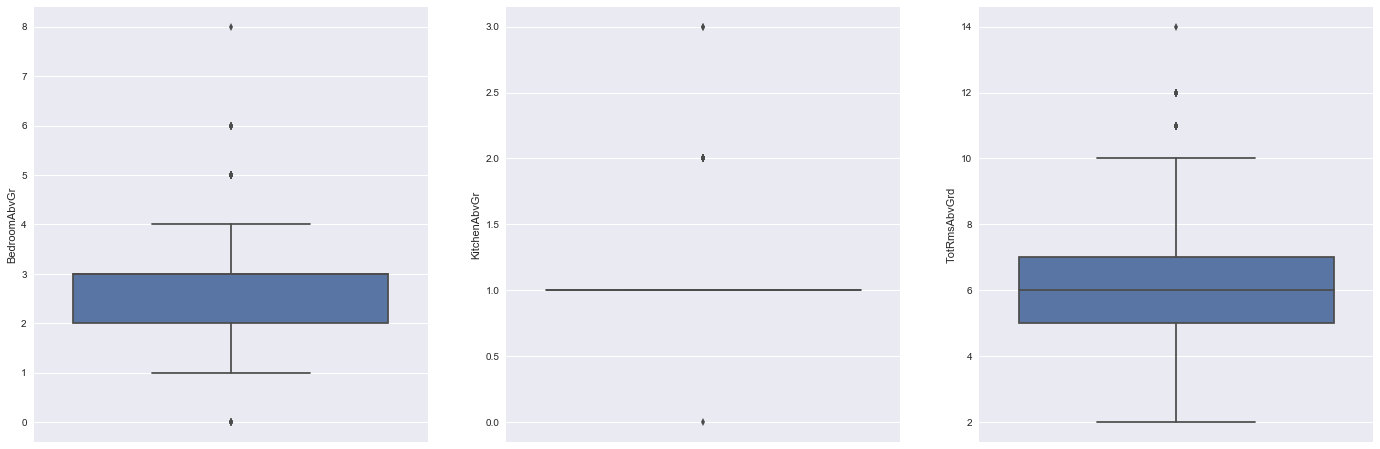

In [105]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="BedroomAbvGr",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="KitchenAbvGr",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="TotRmsAbvGrd",data=df_pd2)
plt.show()

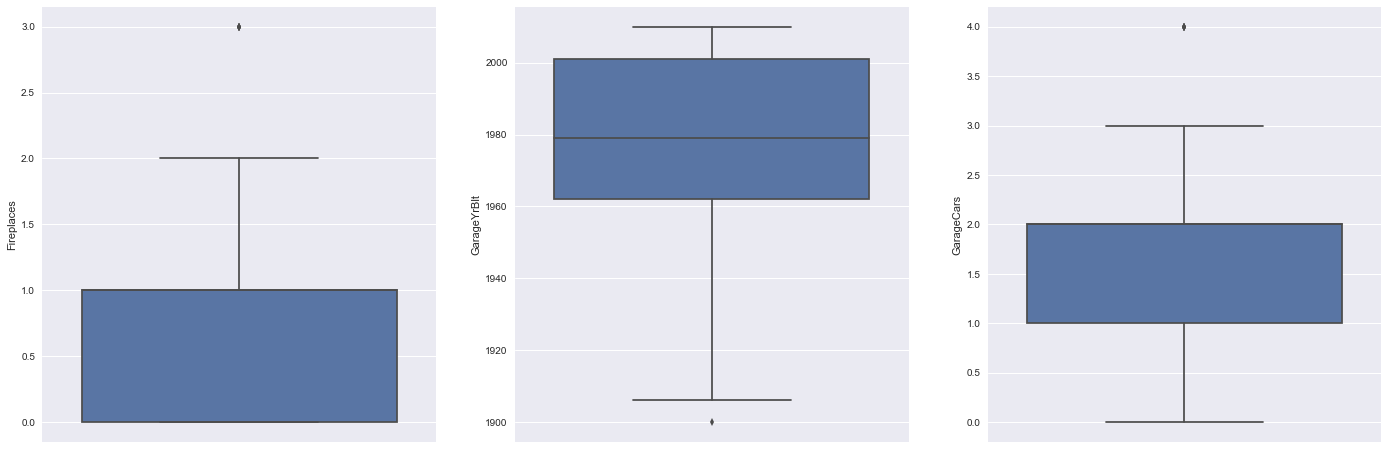

In [106]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="Fireplaces",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="GarageYrBlt",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="GarageCars",data=df_pd2)
plt.show()

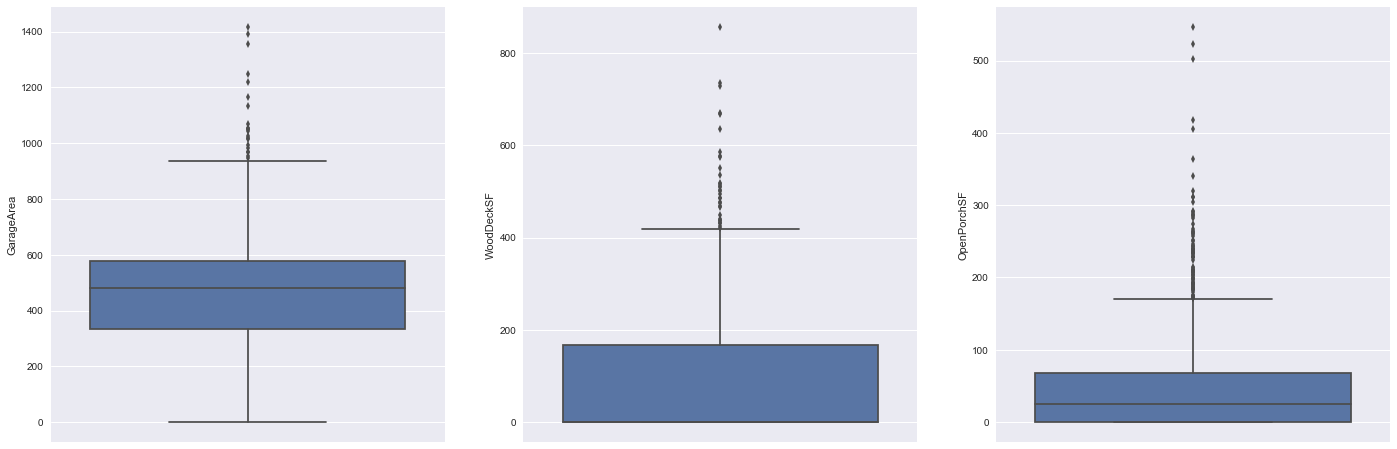

In [107]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="GarageArea",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="WoodDeckSF",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="OpenPorchSF",data=df_pd2)
plt.show()

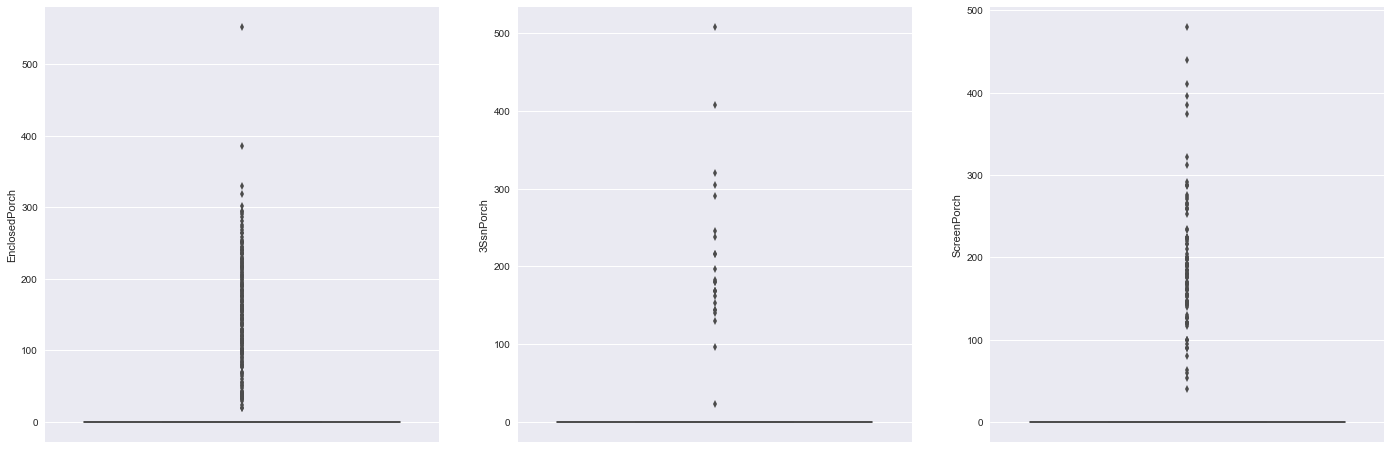

In [108]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="EnclosedPorch",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="3SsnPorch",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="ScreenPorch",data=df_pd2)
plt.show()

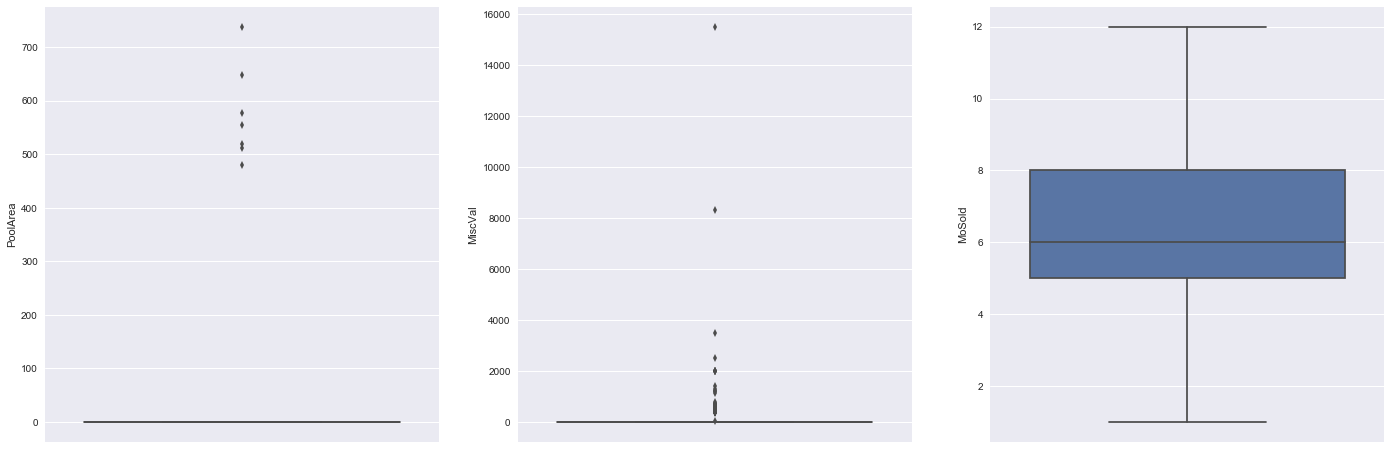

In [109]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(131)
sns.boxplot(y="PoolArea",data=df_pd2)
plt.subplot(132)
sns.boxplot(y="MiscVal",data=df_pd2)
plt.subplot(133)
sns.boxplot(y="MoSold",data=df_pd2)
plt.show()

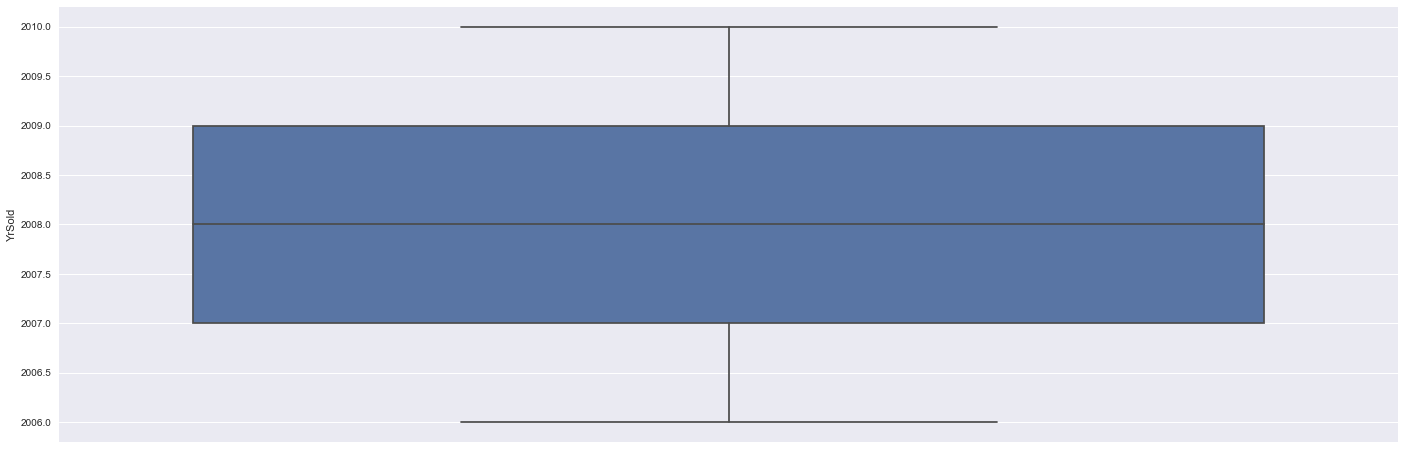

In [110]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
#plt.subplot(131)
sns.boxplot(y="YrSold",data=df_pd2)
plt.show()

### Handle of outlier
Outlier is observations that fall below lower side or above upper side.

To handle outlier we approach by replacing the value greater than upper side with upper side value and also replacing the value lower than lower side with lower side value.
So, we need calculate upper and lower side from quantile value, quantile is probability distribution of variable. In General, there are three quantile:
1. Q1 = the value that cut off 25% of the first data when it is sorted in ascending order. 
2. Q2 = cut off data, or median, it's 50 % of the data 
3. Q3 = the value that cut off 75% of the first data when it is sorted in ascending order.

IQR or interquartile range is range between Q1 and Q3. IQR = Q3 - Q1.

Upper side = Q3 + 1.5 * IQR

Lower side = Q1 - 1.5 * IQR


### Handle of outlier in data train

#### Calculate upper&lower side in pyspark dataframe

In [66]:
df_pd2.describe()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,label
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.041096,10516.828082,1971.267808,1984.865753,103.686986,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.024031,9981.264932,30.202904,20.645407,180.569114,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,70.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [67]:
#create quantile dataframe
def quantile(e):
    """Input is dataframe and return new dataframe with value of quantile from numerical columns"""
    percentiles = [0.25, 0.5, 0.75]
    quant=spark.createDataFrame(zip(percentiles, *e.approxQuantile(num_cols, percentiles, 0.0)),
                               ['percentile']+num_cols) #calculate quantile from pyspark dataframe, 0.0 is relativeError,
                                                        #The relative target precision to achieve (>= 0). If set to zero, 
                                                        #the exact quantiles are computed, which could be very expensive
                                                        #and aggregate the result with percentiles variable, 
                                                        #then create pyspark dataframe
    return quant

In [68]:
#call function quantile
quantile=quantile(df_final)

In [69]:
#function to calculate uppler side
def upper_value(b,c):
    """Input is quantile dataframe and name of numerical column and Retrun upper value from the column"""
    q1 = b.select(c).collect()[0][0] #select value of q1 from the column
    q2 = b.select(c).collect()[1][0] #select value of q2 from the column
    q3 = b.select(c).collect()[2][0] #select value of q3 from the column
    IQR=q3-q1  #calculate the value of IQR
    upper= q3 + (IQR*1.5)   #calculate the value of upper side
    return upper

In [70]:
help(upper_value)

Help on function upper_value in module __main__:

upper_value(b, c)
    Input is quantile dataframe and name of numerical column and Retrun upper value from the column



In [71]:
#function to calculate lower side
def lower_value(b,c):
    """Input is quantile dataframe and name of numerical column and Retrun lower value from the column"""
    q1 = b.select(c).collect()[0][0] #select value of q1 from the column
    q2 = b.select(c).collect()[1][0] #select value of q2 from the column
    q3 = b.select(c).collect()[2][0] #select value of q3 from the column
    IQR=q3-q1                   #calculate the value of IQR
    lower= q1 - (IQR*1.5)       #calculate the value of lower side
    return lower

#### Replacing the outlier

In [72]:
#function for replacing outlier by upper side
def replce_outlier_up2(d,col, value):
    """Input is name of numerical column and it's upper side value"""
    #global d
    d=d.withColumn(col, F.when(d[col] > value , value).otherwise(d[col]))
    return d

In [73]:
#function for replacing outlier by lower side
def replce_outlier_low2(d,col, value):
    """Input is name of numerical column and it's lower side value"""
    #global df_final
    d=d.withColumn(col, F.when(d[col] < value , value).otherwise(d[col]))
    return d

In [74]:
#call function to calculate lower side and replace value under lower side with value lower side
for i in num_cols:
    lower=lower_value(quantile,i)
    df_final=replce_outlier_low2(df_final, i, lower)

In [75]:
#call function to calculate upper side and replace value above upper side with value upper side
for x in num_cols:
    upper=upper_value(quantile,x)
    df_final=replce_outlier_up2(df_final, x, upper)

In [76]:
type(df_final)

pyspark.sql.dataframe.DataFrame

#### Check distribution after replacing outlier

In [77]:
df_final.select(num_cols).describe().show()

+-------+-----------------+-----------------+------------------+------------------+------------------+------------------+------------------+----------+-----------------+------------------+------------------+------------------+------------+------------------+------------------+------------+------------------+-------------------+------------------+------------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------+---------+-----------+--------+-------+------------------+------------------+
|summary|       MSSubClass|      LotFrontage|           LotArea|         YearBuilt|      YearRemodAdd|        MasVnrArea|        BsmtFinSF1|BsmtFinSF2|        BsmtUnfSF|       TotalBsmtSF|          1stFlrSF|          2ndFlrSF|LowQualFinSF|         GrLivArea|      BsmtFullBath|BsmtHalfBath|          FullBath|           HalfBath|      BedroomAbvGr|KitchenAbvGr|     TotRmsAbvGrd|        Fireplaces|       GarageYrBlt

In [78]:
df_pd3=df_final.toPandas()

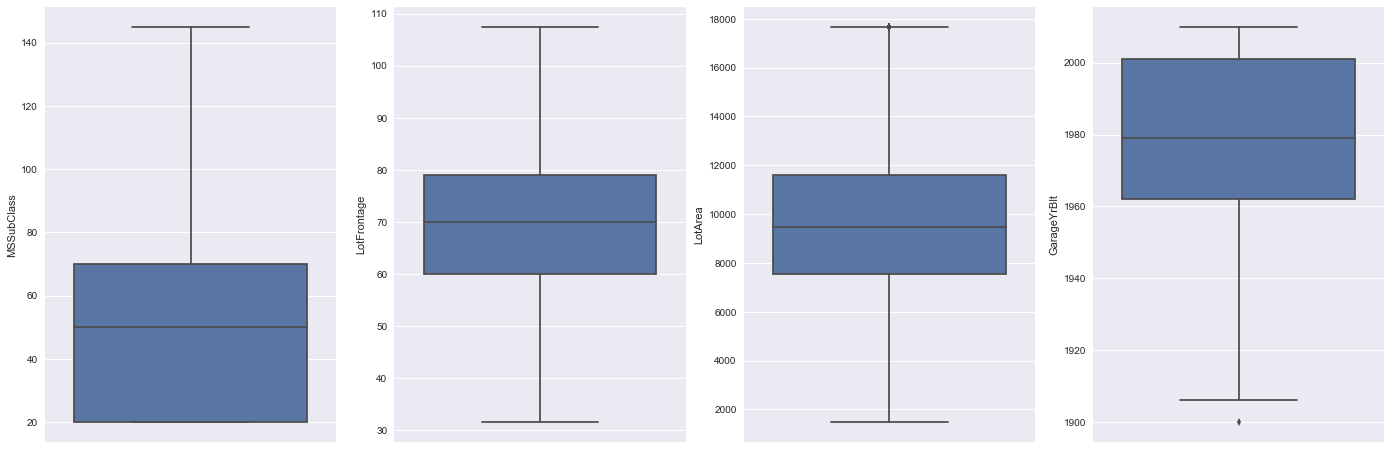

In [124]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(141)
sns.boxplot(y="MSSubClass",data=df_pd3)
plt.subplot(142)
sns.boxplot(y="LotFrontage",data=df_pd3)
plt.subplot(143)
sns.boxplot(y="LotArea",data=df_pd3)
plt.subplot(144)
sns.boxplot(y="GarageYrBlt",data=df_pd2)
plt.show()

### Handle of outlier in data test

In [79]:
pd_9=test_data.toPandas()

In [80]:
pd_9.describe()

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.645648,9819.161069,1971.357779,1983.662783,100.712132,439.203564,52.619602,554.294722,...,472.769020,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,20.561791,4955.517327,30.390071,21.130467,176.709827,455.111888,176.693301,437.110508,...,216.974165,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,60.000000,7391.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.500000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,69.000000,9399.000000,1973.000000,1992.000000,0.000000,351.000000,0.000000,460.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,78.000000,11517.500000,2001.000000,2004.000000,162.000000,752.000000,0.000000,797.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [81]:
#create quantile dataframe
def quantile(e):
    percentiles = [0.25, 0.5, 0.75]
    quant=spark.createDataFrame(zip(percentiles, *e.approxQuantile(num_cols_test, percentiles, 0.0)),
                               ['percentile']+num_cols_test) #calculate quantile from pyspark dataframe, 0.0 is relativeError,
                                                        #The relative target precision to achieve (>= 0). If set to zero, 
                                                        #the exact quantiles are computed, which could be very expensive
                                                        #and aggregate the result with percentiles variable, 
                                                        #then create pyspark dataframe
    return quant

In [82]:
#call funtion quantile
quantile=quantile(test_data)

In [83]:
quantile.select('MSSubClass').show()

+----------+
|MSSubClass|
+----------+
|      20.0|
|      50.0|
|      70.0|
+----------+



In [84]:
#call function to calculate lower side and replace value under lower side with value lower side
for i in num_cols_test:
    lower=lower_value(quantile,i)
    test_data=replce_outlier_low2(test_data, i, lower)

In [85]:
#call function to calculate upper side and replace value above upper side with value upper side
for x in num_cols_test:
    upper=upper_value(quantile,x)
    test_data=replce_outlier_up2(test_data, x, upper)

In [86]:
test_data.count()

1459

In [87]:
pd_3=test_data.toPandas()

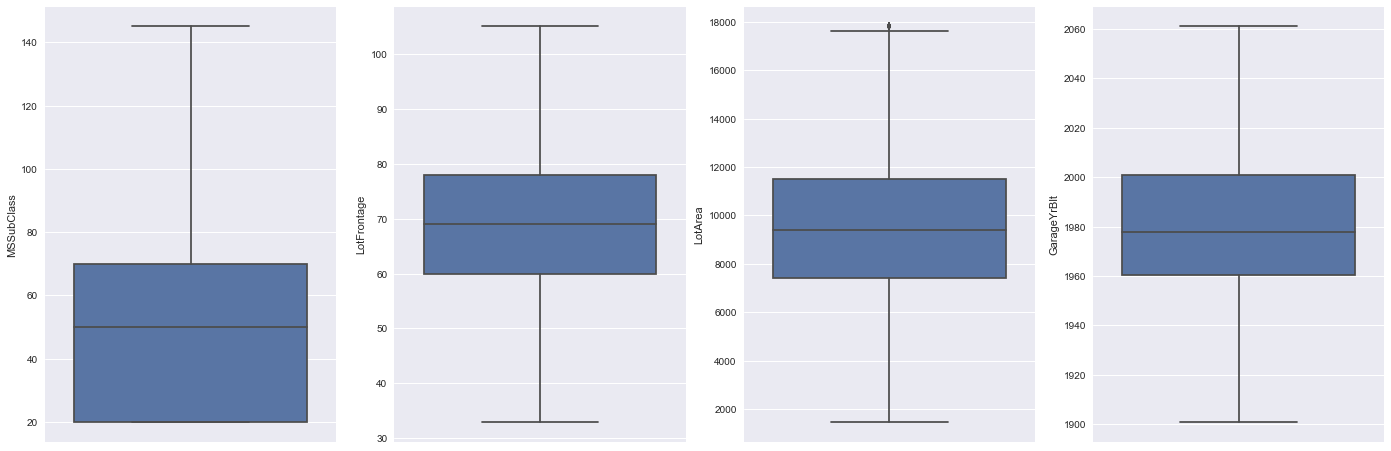

In [88]:
#Check outlier in numerical variable
plt.figure(figsize=(24,8))
plt.subplot(141)
sns.boxplot(y="MSSubClass",data=pd_3)
plt.subplot(142)
sns.boxplot(y="LotFrontage",data=pd_3)
plt.subplot(143)
sns.boxplot(y="LotArea",data=pd_3)
plt.subplot(144)
sns.boxplot(y="GarageYrBlt",data=pd_3)
plt.show()

### Feature Engineering
Before splitting the data train, all categorical variables must be made numerical. There are several approaches to categorical variables in SparkML, including:
1. StringIndexer, which is to encode the string label into the index label by sequencing the string frequency descending and giving the smallest index (0)
at most string frequency.
2. One-hot Encoding, which is mapping the label column (string label) on the binary column.
3. Vector assembler, which is mapping all columns in vector.

In [93]:
def check_distinct(a1,a2):
    """input are two dataframe that you want to compare categorical variables and the output is 
    total distinct categories in both dataframe"""
    total1=0
    total2=0
    for y in cat_cols:
        distinct1=a1.select([y]).distinct().count() #count distinct column in dataframe1
        distinct2=a2.select([y]).distinct().count() #count distinct column in dataframe2
        var1=a1.select([y]).distinct().collect() #define distinct category in column in dataframe1
        var1=[r[y] for r in var1]
        var2=a2.select([y]).distinct().collect()
        var2=[r[y] for r in var2]
        total1=total1+distinct1
        total2=total2+distinct2   
    return total1, total2    

In [94]:
#function to execute feature engineering
def feature_engineering(a1):
    """Function for feature engineering (StringIndexer and OneHotEncoder process)"""
    cat_columns_string_vec = []
    for c in cat_cols:
        cat_columns_string= c+"_vec"
        cat_columns_string_vec.append(cat_columns_string)
    stringIndexer = [StringIndexer(inputCol=x, outputCol=x+"_Index")
                  for x in cat_cols]
    #use oneHotEncoder to convert categorical variable to binary
    encoder = [OneHotEncoder(inputCol=x+"_Index", outputCol=y)
           for x,y in zip(cat_cols, cat_columns_string_vec)]
    #create list of stringIndexer and encoder with 2 dimension
    tmp = [[i,j] for i,j in zip(stringIndexer, encoder)]
    tmp = [i for sublist in tmp for i in sublist]
    cols_assember=num_id + num_cols + cat_columns_string_vec
    assembler=VectorAssembler(inputCols=cols_assember, outputCol='features')
    tmp += [assembler]
    pipeline=Pipeline(stages=tmp)
    df_final_feat=pipeline.fit(a1).transform(a1)
    return df_final_feat

In [98]:
#fucntion to call fucntion feature_engineering and check_distinct
def Main_feature_engineering(df,df2):   
    """Function for calling check_distinct and feature_engineering. Then Join data train and data test if distinct categories 
    between data train and data test not same then do feature engineering, If distinct same will do feature engineering data train
    and data test separately"""
    dist_total1, dist_total2=check_distinct(df,df2)   
    if dist_total1!=dist_total2:
        Label_df=df.select('Id', 'label')
        df_final2=df.drop('label')
        all_df =df_final2.union(df2)
        all_df_feat=feature_engineering(all_df)
        id_train=df.select('Id').collect()
        id_train=[r['Id'] for r in id_train]
        id_test=df2.select('Id').collect()
        id_test=[r['Id'] for r in id_test]
        a=all_df_feat.filter(all_df['Id'].isin(id_train))
        b=all_df_feat.filter(all_df['Id'].isin(id_test))
        a=a.join(Label_df, 'Id')
    else:
        a=feature_engineering(df)
        b=feature_engineering(df2)        
    return a,b

### Call function feature engineering after solve insignificant categories in data train

In [99]:
#call function feature engineering
%time data2, test2=Main_feature_engineering(df_final, test_data)

Wall time: 9min 45s


In [100]:
#view result of feature engineering in data train
data2.select('Id', 'features').show(5)

+---+--------------------+
| Id|            features|
+---+--------------------+
|  1|(222,[0,1,2,3,4,5...|
|  2|(222,[0,1,2,3,4,5...|
|  3|(222,[0,1,2,3,4,5...|
|  4|(222,[0,1,2,3,4,5...|
|  5|(222,[0,1,2,3,4,5...|
+---+--------------------+
only showing top 5 rows



In [101]:
#view result of feature engineering in data test
test2.select('Id', 'features').show(5)

+----+--------------------+
|  Id|            features|
+----+--------------------+
|1461|(222,[0,1,2,3,4,5...|
|1462|(222,[0,1,2,3,4,5...|
|1463|(222,[0,1,2,3,4,5...|
|1464|(222,[0,1,2,3,4,5...|
|1465|(222,[0,1,2,3,4,5...|
+----+--------------------+
only showing top 5 rows



### Split Data train into train and test

In [102]:
#Split df_final to train and test, train 70% and test 30%. Define seed 24 so the random data that we split will not change.
#we can define seed with any value
data_train, data_test=data2.randomSplit([0.7,0.3], 24)

### Modelling 
We will use four algorithm to make a model and prediction, they are:

1. Linear Regression
Linear regression used logit function in prediction the probability. 
2. Decision Tree
This algorithm will find the most significant independent variable to  create a values. 
3. Random Forest
This algorithm build multiple decision trees and merges them together and use bagging method.
4. Gradient Boosting 
This algorithm use boosting ensemble technic. This technique employs the logic in which the subsequent predictors learn from the mistakes of the previous predictors.

### Evaluation
To evaluate model we use metrics, below:
1. RMSE (Root Mean Square Error)
 RMSE measures the differences between predicted values by the model and the actual values. RMSE can also state the size of the error generated by a prediction model.
2. R2 or R squared
 R-squared is a statistical measure of how close the data are to the fitted regression line.
 R-squared is always between 0 and 100%:

   - 0% indicates that the model explains none of the variability of the response data around its mean.
   - 100% indicates that the model explains all the variability of the response data around its mean.


### Modelling & Evaluation in Data train

#### Linear Regression

In [103]:
#Create logistic regression model to data train
lr = LinearRegression(featuresCol='features', labelCol='label')

#fit model to data train
lr_model = lr.fit(data_train)

In [104]:
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lr_model.coefficients))
print("Intercept: %s" % str(lr_model.intercept))

Coefficients: [-0.3567815235883516,-101.64285697411556,12.206060585540422,1.092564498667064,427.58144148500884,84.76911028589525,0.7733872733321102,3.769524317225006,0.0,-13.860899698586525,35.71633350979042,75.96964547220726,87.97895438677112,0.0,-26.83578684852574,812.2518055131068,0.0,2164.6184909256904,1021.8603054055018,-2348.742130414442,0.0,518.3138588302471,13178.654419595021,22.479562415469122,5342.899002682942,11.296407553629761,4.924561182522757,28.035478650572426,0.0,0.0,0.0,0.0,0.0,-405.47964259361277,117.96536538280492,963.6360298430842,1528.5489600612102,9172.820883029497,13809.820811324755,-4022.5918727765766,-4041.2072430228254,-4711.5184912513005,-6926.207550183576,6136.17307026814,6457.222146267597,1802.4887302493391,0.0,7441.613320488233,7240.442283982668,16227.578732971804,-19030.265672517347,-12016.766230323607,-10604.56881048054,-6151.67242579588,-11293.940163080444,-14797.882657865972,-1937.6894150567755,15745.560324096434,-6245.713574297871,-5452.688505161482,-

In [105]:
#Summarize model over the data train and see the residual
trainingSummary = lr_model.summary
trainingSummary.residuals.show()

+-------------------+
|          residuals|
+-------------------+
|  15256.66046846495|
| -37385.69734216272|
|-27647.176720130956|
|-2239.6602344769053|
| -3410.774663733784|
|  -7011.09891448589|
|  7509.266952410573|
|-11037.643065451877|
|-17067.605981558096|
| 3334.4243372266646|
| -924.3050105771981|
| 24883.377536825137|
| -557.7267156091984|
| -6086.000126113882|
|  5129.319041230716|
|-178.17293964046985|
|-31989.010358080966|
| -2420.508782338118|
|  1958.298614095198|
| 2825.7643796456978|
+-------------------+
only showing top 20 rows



In [106]:
#calculate RMSE and R2 in training data
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 21178.857011
r2: 0.931966


In [107]:
#Transform model to data test
lr_prediction= lr_model.transform(data_test)

In [108]:
#view id, label, prediction and probability from result of modelling
lr_prediction.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
|206022.51514051552|208500|(222,[0,1,2,3,4,5...|
|   204392.37750819|181500|(222,[0,1,2,3,4,5...|
|158636.26291254023|140000|(222,[0,1,2,3,4,5...|
|173231.74339712667|143000|(222,[0,1,2,3,4,5...|
| 268923.8548053382|307000|(222,[0,1,2,3,4,5...|
+------------------+------+--------------------+
only showing top 5 rows



#### Linear Regression Evaluation

In [109]:
#Calculate R squared
lr_evaluator=RegressionEvaluator(predictionCol='prediction', metricName='r2')
print("R squared (R2) on test data=%g" % lr_evaluator.evaluate(lr_prediction))

R squared (R2) on test data=0.813349


In [110]:
#Calculate RMSE
lr_evaluator=RegressionEvaluator(predictionCol='prediction', metricName='rmse')
print("Root Mean Squared Error (RMSE) on linear regression model=%g" % lr_evaluator.evaluate(lr_prediction))

Root Mean Squared Error (RMSE) on linear regression model=32432.5


In [111]:
#another way to calculate RMSE, and result is same with syntax above
test_result=lr_model.evaluate(data_test)
print("Root Mean Squared Error (RMSE) on linear regression model=%g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on linear regression model=32432.5


In [112]:
test_result.residuals.show(6)

+-------------------+
|          residuals|
+-------------------+
| 2477.4848594844807|
|-22892.377508189995|
| -18636.26291254023|
|-30231.743397126673|
|   38076.1451946618|
| -72788.01796597708|
+-------------------+
only showing top 6 rows



#### Linear Regression With Hyper-Parameter Tuning

In [113]:
#Create linear regression model to data train
lr_hyper = LinearRegression(featuresCol='features', labelCol='label')


#Hyper-Parameter Tuning
paramGrid_lr = ParamGridBuilder() \
    .addGrid(lr_hyper.regParam, [0.1, 0.01]) \
    .addGrid(lr_hyper.elasticNetParam, [0.8, 0.7]) \
    .build()
crossval_lr = CrossValidator(estimator=lr_hyper,
                             estimatorParamMaps=paramGrid_lr,
                             evaluator=RegressionEvaluator(),
                             numFolds=3)
#fit model to data train
lr_model_hyper= crossval_lr.fit(data_train)

In [114]:
#Summarize model over the data train and see the residual
trainingSummary = lr_model_hyper.bestModel.summary
trainingSummary.residuals.show(5)

+-------------------+
|          residuals|
+-------------------+
| 17699.507379502524|
| -38002.90200099116|
|-28747.582891629543|
| -7212.201827362413|
|  -5833.39323362126|
+-------------------+
only showing top 5 rows



In [115]:
#calculate RMSE and R2 in training data
trainingSummary = lr_model_hyper.bestModel.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 21675.643508
r2: 0.928737


In [116]:
#Transform model to data test
lr_prediction_hyper= lr_model_hyper.transform(data_test)

In [117]:
#view label, prediction and feature from result of modelling
lr_prediction_hyper.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
| 202916.8188786807|208500|(222,[0,1,2,3,4,5...|
|206588.58170475485|181500|(222,[0,1,2,3,4,5...|
|160580.28958891146|140000|(222,[0,1,2,3,4,5...|
|170943.59791342844|143000|(222,[0,1,2,3,4,5...|
|270766.82050359016|307000|(222,[0,1,2,3,4,5...|
+------------------+------+--------------------+
only showing top 5 rows



#### Linear Regression With Hyper-Parameter Tuning Evaluation

In [118]:
#Calculate RMSE
eval_rmse=RegressionEvaluator(metricName="rmse")
print("Root Mean Squared Error (RMSE) on linear regression model=%g" % eval_rmse.evaluate(lr_prediction_hyper))

Root Mean Squared Error (RMSE) on linear regression model=32207.3


In [119]:
#Calculate Rsquared
eval_r2=RegressionEvaluator(metricName="r2")
print("R squared (R2) on linear regression model=%g" % eval_r2.evaluate(lr_prediction_hyper))

R squared (R2) on linear regression model=0.815932


#### Decision Tree Regression

In [120]:
#Create Decision Tree model regression
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'label')

#Fit model to data train
dt_model = dt.fit(data_train)

#Make prediction on data test
dt_prediction = dt_model.transform(data_test)

In [121]:
#View result with column selection
dt_prediction.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
|195979.12162162163|208500|(222,[0,1,2,3,4,5...|
|145070.55813953487|181500|(222,[0,1,2,3,4,5...|
|275913.26666666666|140000|(222,[0,1,2,3,4,5...|
| 138020.9274611399|143000|(222,[0,1,2,3,4,5...|
| 261017.7142857143|307000|(222,[0,1,2,3,4,5...|
+------------------+------+--------------------+
only showing top 5 rows



#### Decision Tree Regression Evaluation

In [316]:
#Calculate R squared
dt_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='r2')
print("R squared (R2) on Decision Tree Model=%g" % dt_evaluator.evaluate(dt_prediction))

R squared (R2) on Decision Tree Model=0.695195


In [122]:
#Calculate RMSE
dt_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='rmse')
print("Root Mean Squared Error (RMSE) on Decision Tree Model=%g" % dt_evaluator.evaluate(dt_prediction))

Root Mean Squared Error (RMSE) on Decision Tree Model=41445.4


#### Decision Tree Regression with Hyper-Parameter Tuning

In [124]:
#Create Decision Tree Model
dt_hyper=DecisionTreeRegressor(featuresCol = 'features', labelCol = 'label')

#Hyper-Parameter Tuning
paramGrid_dt = ParamGridBuilder() \
    .addGrid(dt_hyper.maxDepth, [5, 7]) \
    .addGrid(dt_hyper.maxBins, [10,20]) \
    .build()
crossval_dt = CrossValidator(estimator=dt_hyper,
                             estimatorParamMaps=paramGrid_dt,
                             evaluator=RegressionEvaluator(),
                             numFolds=5)
#fit model to data train
dt_model_hyper = crossval_dt.fit(data_train)

In [125]:
#Transform model to data test
dt_prediction_hyper= dt_model_hyper.transform(data_test)

In [126]:
#View prediction, label and featues from prediction
dt_prediction_hyper.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
|          201915.8|208500|(222,[0,1,2,3,4,5...|
|151923.85321100918|181500|(222,[0,1,2,3,4,5...|
|285866.75675675675|140000|(222,[0,1,2,3,4,5...|
|         158968.04|143000|(222,[0,1,2,3,4,5...|
|         261495.12|307000|(222,[0,1,2,3,4,5...|
+------------------+------+--------------------+
only showing top 5 rows



#### Decision Tree Regression with Hyper-Parameter Tuning Evaluation

In [127]:
#Calculate Rsquared
eval_r2=RegressionEvaluator(metricName="r2")
print("R squared (R2) on Decision Tree Model=%g" % eval_r2.evaluate(dt_prediction_hyper))

R squared (R2) on Decision Tree Model=0.702579


In [128]:
#Calculate RMSE
eval_rmse=RegressionEvaluator(metricName="rmse")
print("Root Mean Squared Error (RMSE) on Decision Tree Model=%g" % eval_rmse.evaluate(dt_prediction_hyper))

Root Mean Squared Error (RMSE) on Decision Tree Model=40940.3


#### Random Forest Regression

In [129]:
#Create Random forest model regression
rf = RandomForestRegressor(featuresCol ='features', labelCol = 'label')

#Fit model to data train
rf_model = rf.fit(data_train)

#Make prediction on data test
rf_prediction = rf_model.transform(data_test)

In [130]:
#View result with column selection
rf_prediction.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
|200735.93820686563|208500|(222,[0,1,2,3,4,5...|
| 162644.9969287647|181500|(222,[0,1,2,3,4,5...|
|187385.47188272633|140000|(222,[0,1,2,3,4,5...|
|142299.42073633274|143000|(222,[0,1,2,3,4,5...|
| 267402.3697880438|307000|(222,[0,1,2,3,4,5...|
+------------------+------+--------------------+
only showing top 5 rows



#### Random Forest Regression Evaluation

In [131]:
#Calculate R squared
rf_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='r2')
print("R squared (R2) on Random Forest Model=%g" % rf_evaluator.evaluate(rf_prediction))

R squared (R2) on Random Forest Model=0.806329


In [132]:
#Calculate RMSE
rf_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='rmse')
print("Root Mean Squared Error (RMSE) on Random Forest Model=%g" % rf_evaluator.evaluate(rf_prediction))

Root Mean Squared Error (RMSE) on Random Forest Model=33036.8


#### Random Forest Regression with Hyper Parameter Tuning

In [135]:
#define random forest regressor
rf_hyper= RandomForestRegressor(featuresCol='features', labelCol="label")

# Hyper-Parameter Tuning
paramGrid_rf = ParamGridBuilder() \
    .addGrid(rf_hyper.numTrees, [40, 60, 80, 100]) \
    .build()
crossval_rf = CrossValidator(estimator=rf_hyper,
                             estimatorParamMaps=paramGrid_rf,
                             evaluator=RegressionEvaluator(),
                             numFolds=3) 
#fit model to data train
rf_model_hyper=crossval_rf.fit(data_train)

In [136]:
#Transform model to data test
rf_prediction_hyper= rf_model_hyper.transform(data_test)

In [137]:
#View result of prediction, label, features
rf_prediction_hyper.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
|201182.31839512818|208500|(222,[0,1,2,3,4,5...|
|165372.14872866447|181500|(222,[0,1,2,3,4,5...|
| 188483.2744452128|140000|(222,[0,1,2,3,4,5...|
|151979.19486561004|143000|(222,[0,1,2,3,4,5...|
|272443.46943220374|307000|(222,[0,1,2,3,4,5...|
+------------------+------+--------------------+
only showing top 5 rows



#### Random Forest Regression  with Hyper Parameter Tuning Evaluation

In [145]:
#Calculate R squared
rf_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='r2')
print("R squared (R2) on Random Forest Model=%g" % rf_evaluator.evaluate(rf_prediction_hyper))

R squared (R2) on Random Forest Model=0.830801


In [146]:
#Calculate RMSE
rf_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='rmse')
print("Root Mean Squared Error (RMSE) on Random Forest Model=%g" % rf_evaluator.evaluate(rf_prediction_hyper))

Root Mean Squared Error (RMSE) on Random Forest Model=30879


#### Gradient Boosted Tree Regression

In [138]:
#Create Gradient Boosted Tree regression
gbt = GBTRegressor(featuresCol ='features', labelCol = 'label', maxIter=15)

#Fit model to data train
gbt_model = gbt.fit(data_train)

#Make prediction on data test
gbt_prediction = gbt_model.transform(data_test)

In [139]:
#View result of prediction, label, features
gbt_prediction.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
|198855.77018259797|208500|(222,[0,1,2,3,4,5...|
|147966.63939558202|181500|(222,[0,1,2,3,4,5...|
|267932.11451249116|140000|(222,[0,1,2,3,4,5...|
| 142037.9777792396|143000|(222,[0,1,2,3,4,5...|
| 271687.1215977744|307000|(222,[0,1,2,3,4,5...|
+------------------+------+--------------------+
only showing top 5 rows



#### Gradient Boosted Tree Regression Evaluation

In [140]:
#Calculate R squared
gbt_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='r2')
print("R squared (R2) on Gradient Boosted Model=%g" % gbt_evaluator.evaluate(gbt_prediction))

R squared (R2) on Gradient Boosted Model=0.71064


In [141]:
#Calculate RMSE
gbt_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='rmse')
print("Root Mean Squared Error (RMSE) on Gradient Boosted Model=%g" % gbt_evaluator.evaluate(gbt_prediction))

Root Mean Squared Error (RMSE) on Gradient Boosted Model=40381.7


#### Gradient Boosted Tree Regression with Hyper Parameter Tuning

In [142]:
#Create Gradient Boosted Tree regression
gbt_hyper = GBTRegressor(featuresCol ='features', labelCol = 'label')

# Hyper-Parameter Tuning
paramGrid_gbt = ParamGridBuilder() \
    .addGrid(gbt_hyper.maxIter, [10,20])\
    .addGrid(gbt_hyper.maxDepth, [10, 12,15]) \
    .build()
crossval_gbt = CrossValidator(estimator=gbt_hyper,
                             estimatorParamMaps=paramGrid_gbt,
                             evaluator=RegressionEvaluator(),
                             numFolds=3)
#Fit Model to data train
gbt_model_hyper = crossval_gbt.fit(data_train)


In [143]:
#Transform model to data test
gbt_prediction_hyper= gbt_model_hyper.transform(data_test)

In [144]:
#View result of prediction, label, features
gbt_prediction_hyper.select("prediction","label","features").show(5)

+------------------+------+--------------------+
|        prediction| label|            features|
+------------------+------+--------------------+
|216144.71424815585|208500|(222,[0,1,2,3,4,5...|
|169725.21083833117|181500|(222,[0,1,2,3,4,5...|
|233561.10019166005|140000|(222,[0,1,2,3,4,5...|
|140085.39891284084|143000|(222,[0,1,2,3,4,5...|
|235473.70870230484|307000|(222,[0,1,2,3,4,5...|
+------------------+------+--------------------+
only showing top 5 rows



#### Gradient Boosted Tree Regression  with Hyper Parameter Tuning Evaluation

In [145]:
#Calculate R squared
gbt_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='r2')
print("R squared (R2) on Gradient Boosted Model=%g" % gbt_evaluator.evaluate(gbt_prediction_hyper))

R squared (R2) on Gradient Boosted Model=0.650356


In [146]:
#Calculate RMSE
gbt_evaluator=RegressionEvaluator(predictionCol='prediction', labelCol="label", metricName='rmse')
print("Root Mean Squared Error (RMSE) on Gradient Boosted Model=%g" % gbt_evaluator.evaluate(gbt_prediction_hyper))

Root Mean Squared Error (RMSE) on Gradient Boosted Model=44389.3


### Modelling data test

In implementation to data test, there is important thing that must be considered. All the thing that have done in data train must do in data test. In this case, we have done cleansing missing values, outlier and replacing insignificant categories. 

We will not do future engineering here because future engineering in data test have done in step above.

And due to Random Forest with hyper-parameter tunning has best model evaluation - RMSE and R2 smallest - So, we will use Random Forest to predict price house in data test.

#### Modelling

Due to Random Forest with Hypert  Parameter has RMSE lowest, then we will use that model in implementation to data test

In [148]:
#Transform model to data test
predic= rf_model_hyper.transform(test2)

In [149]:
#View result of prediction, label, features
predic.select("Id", "prediction","features").show(5)

+----+------------------+--------------------+
|  Id|        prediction|            features|
+----+------------------+--------------------+
|1461|129697.31567329602|(222,[0,1,2,3,4,5...|
|1462|144122.00994772417|(222,[0,1,2,3,4,5...|
|1463|  185828.892988934|(222,[0,1,2,3,4,5...|
|1464|183758.88797496402|(222,[0,1,2,3,4,5...|
|1465|195088.27929737873|(222,[0,1,2,3,4,5...|
+----+------------------+--------------------+
only showing top 5 rows



In [150]:
#select Id and prediction column
my_submission=predic.select("Id","prediction")

In [151]:
#convert to Pandas dataframe
my_submission2=my_submission.toPandas()

In [152]:
#save to csv
my_submission2.to_csv('E:/Datalabs/my_submission4.csv', index = False, header = True)
